# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:19:23.004902: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:19:26.161350
2025-04-14 20:19:26.161350


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:19:18"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

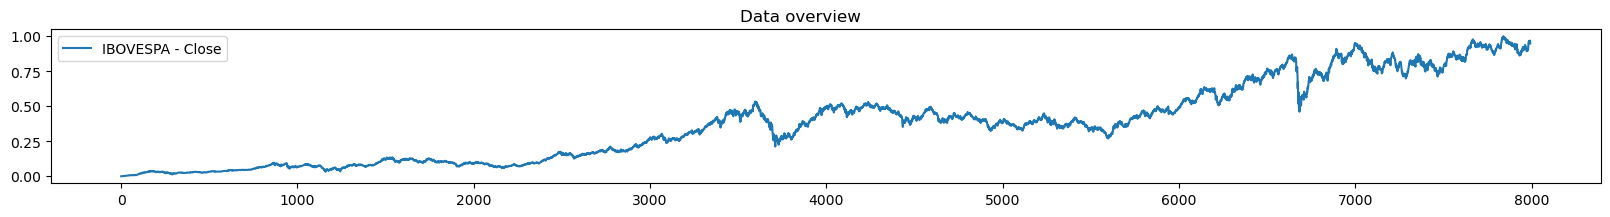

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

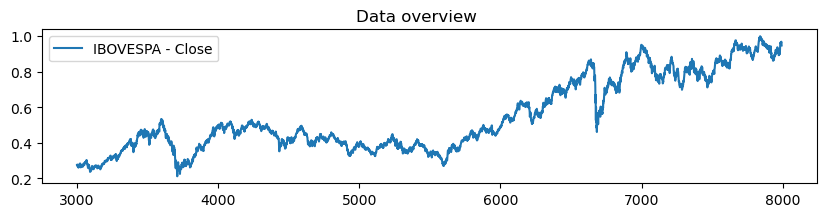

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

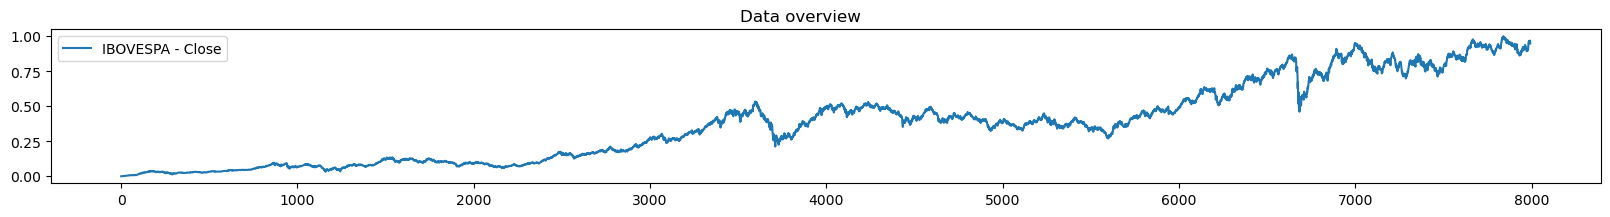

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

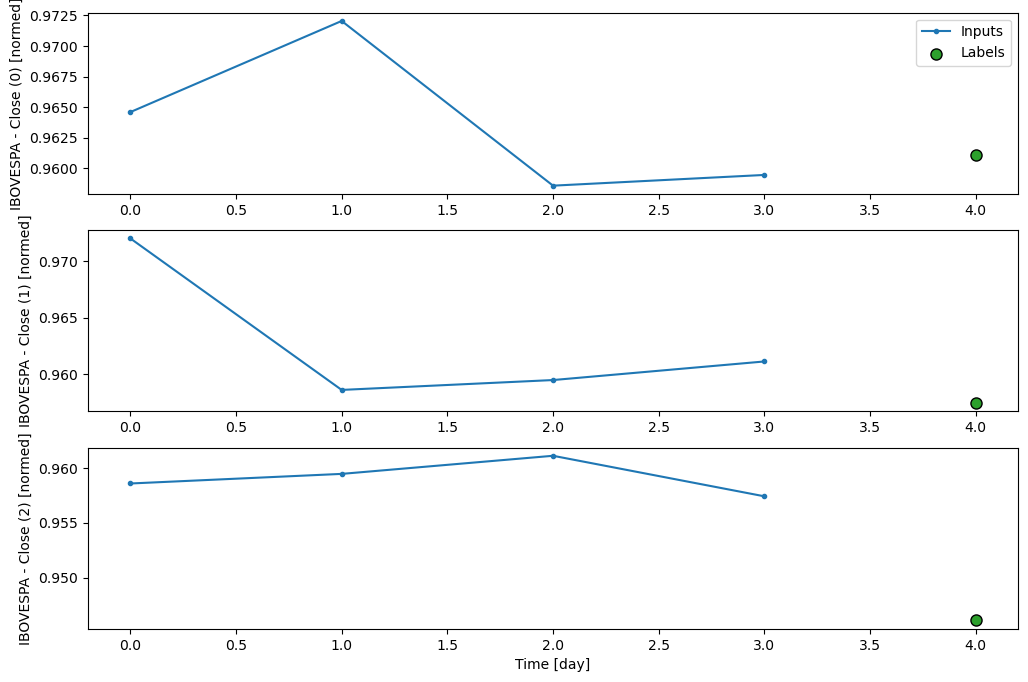

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14:39 4s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 60.4587 - mean_squared_error: 4.8448e-05 - root_mean_squared_error: 0.0062   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 58.1455 - mean_squared_error: 1.4808e-04 - root_mean_squared_error: 0.0110

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 52.6761 - mean_squared_error: 1.5158e-04 - root_mean_squared_error: 0.0115

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 47.2125 - mean_squared_error: 1.4749e-04 - root_mean_squared_error: 0.0116

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.5080 - mean_squared_error: 1.5750e-04 - root_mean_squared_error: 0.0120

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.7717 - mean_squared_error: 1.7899e-04 - root_mean_squared_error: 0.0129

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 40.2170 - mean_squared_error: 2.6033e-04 - root_mean_squared_error: 0.0151

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 39.0112 - mean_squared_error: 3.2226e-04 - root_mean_squared_error: 0.0167

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 37.8709 - mean_squared_error: 3.6171e-04 - root_mean_squared_error: 0.0177

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 36.9197 - mean_squared_error: 4.1622e-04 - root_mean_squared_error: 0.0190

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 36.1008 - mean_squared_error: 4.7360e-04 - root_mean_squared_error: 0.0203

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 35.4024 - mean_squared_error: 5.3216e-04 - root_mean_squared_error: 0.0215

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 34.8301 - mean_squared_error: 5.6895e-04 - root_mean_squared_error: 0.0222

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 34.1060 - mean_squared_error: 6.1800e-04 - root_mean_squared_error: 0.0232

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 33.4915 - mean_squared_error: 7.1596e-04 - root_mean_squared_error: 0.0247

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 33.0887 - mean_squared_error: 8.5642e-04 - root_mean_squared_error: 0.0264

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 32.5388 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288    

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 31.8488 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 31.1931 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 30.6201 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 30.2138 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 30.0812 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 29.9517 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 29.8662 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 29.7388 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 29.6546 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 29.5709 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 29.5292 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 29.2908 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 29.1391 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 28.9516 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 28.5809 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 28.3241 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427 - val_loss: 0.0495 - val_mean_absolute_error: 0.0495 - val_mean_absolute_percentage_error: 5.2745 - val_mean_squared_error: 0.0031 - val_root_mean_squared_error: 0.0554 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6690 - mean_absolute_error: 0.6690 - mean_absolute_percentage_error: 31385.8711 - mean_squared_error: 0.4476 - root_mean_squared_error: 0.6690

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6556 - mean_absolute_error: 0.6556 - mean_absolute_percentage_error: 12995.9697 - mean_squared_error: 0.4308 - root_mean_squared_error: 0.6561 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6019 - mean_absolute_error: 0.6019 - mean_absolute_percentage_error: 9145.4805 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.6103 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5221 - mean_absolute_error: 0.5221 - mean_absolute_percentage_error: 7049.4756 - mean_squared_error: 0.3149 - root_mean_squared_error: 0.5537

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4447 - mean_absolute_error: 0.4447 - mean_absolute_percentage_error: 5604.3711 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4999

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 4692.5591 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4591

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3493 - mean_absolute_error: 0.3493 - mean_absolute_percentage_error: 4104.3335 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4295

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 3624.4363 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.4031

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 3254.4421 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3812

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2738 - mean_absolute_error: 0.2738 - mean_absolute_percentage_error: 3050.9602 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3685

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 2873.8486 - mean_squared_error: 0.1466 - root_mean_squared_error: 0.3570

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 2718.1470 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3467

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 2548.0249 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3351

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 2399.9697 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3247

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 2282.0723 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3162

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 2187.5278 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3092

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 2080.8372 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3011

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 1975.9753 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2930

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 1874.0917 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2848

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 1783.1627 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2774

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 1701.4443 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2706

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 1627.5630 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2643

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 1555.0930 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2580

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 1513.9231 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2544 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275 - val_mean_absolute_percentage_error: 2.9421 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0317 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.4346 - mean_absolute_error: 0.4346 - mean_absolute_percentage_error: 20390.8398 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4346

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 7305.7642 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.4116  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3443 - mean_absolute_error: 0.3443 - mean_absolute_percentage_error: 4857.6357 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3611

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 3857.7361 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3266

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 3137.2163 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2959

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2253 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 2693.6648 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2743

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 2370.0156 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2569

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 2104.0869 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2414

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 1911.0135 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2295

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 1741.5553 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2185

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 1612.0725 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2096

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1493.7574 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2012

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 1393.1006 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.1937

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 1306.3136 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1871

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1241.6438 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1820

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1183.6423 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1773

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 1122.3196 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1722

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1071.5867 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1679

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 1022.0125 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1636

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 983.8260 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1603 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0948 - mean_absolute_error: 0.0948 - mean_absolute_percentage_error: 967.4905 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1588 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1623 - val_mean_squared_error: 1.6695e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 3683.7842 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0784

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 1136.1469 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0529 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 748.8511 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 583.5681 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 476.7467 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 405.9356 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 358.6323 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 324.9148 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 293.1360 - mean_squared_error: 9.7390e-04 - root_mean_squared_error: 0.0288

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 267.5602 - mean_squared_error: 8.9808e-04 - root_mean_squared_error: 0.0275

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 251.0183 - mean_squared_error: 8.4928e-04 - root_mean_squared_error: 0.0267

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 236.5958 - mean_squared_error: 8.0657e-04 - root_mean_squared_error: 0.0259

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 221.5337 - mean_squared_error: 7.6161e-04 - root_mean_squared_error: 0.0251

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 212.6165 - mean_squared_error: 7.3486e-04 - root_mean_squared_error: 0.0246

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 200.6349 - mean_squared_error: 6.9867e-04 - root_mean_squared_error: 0.0239

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 196.0721 - mean_squared_error: 6.8485e-04 - root_mean_squared_error: 0.0237

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 190.0578 - mean_squared_error: 6.6662e-04 - root_mean_squared_error: 0.0233

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 186.8014 - mean_squared_error: 6.5677e-04 - root_mean_squared_error: 0.0232

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 184.4393 - mean_squared_error: 6.4963e-04 - root_mean_squared_error: 0.0230

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 182.1424 - mean_squared_error: 6.4269e-04 - root_mean_squared_error: 0.0229

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 179.9080 - mean_squared_error: 6.3594e-04 - root_mean_squared_error: 0.0228

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 178.4518 - mean_squared_error: 6.3154e-04 - root_mean_squared_error: 0.0227

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 175.6163 - mean_squared_error: 6.2296e-04 - root_mean_squared_error: 0.0225

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 173.5542 - mean_squared_error: 6.1673e-04 - root_mean_squared_error: 0.0224

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 172.2090 - mean_squared_error: 6.1266e-04 - root_mean_squared_error: 0.0223

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 168.9445 - mean_squared_error: 6.0279e-04 - root_mean_squared_error: 0.0221

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 166.4300 - mean_squared_error: 5.9538e-04 - root_mean_squared_error: 0.0220

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 164.5981 - mean_squared_error: 5.9005e-04 - root_mean_squared_error: 0.0219

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 161.0648 - mean_squared_error: 5.7989e-04 - root_mean_squared_error: 0.0217

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 156.0690 - mean_squared_error: 5.6590e-04 - root_mean_squared_error: 0.0214

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 151.9070 - mean_squared_error: 5.5439e-04 - root_mean_squared_error: 0.0212

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 150.9056 - mean_squared_error: 5.5163e-04 - root_mean_squared_error: 0.0211 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2508 - val_mean_squared_error: 1.9571e-04 - val_root_mean_squared_error: 0.0140 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 4028.4648 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 1409.0215 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 946.8459 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0557 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 747.9153 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 44/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 614.8176 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 525.7523 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 461.3743 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 412.6277 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 371.0639 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 335.4080 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 310.6873 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 291.4936 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 270.2066 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 253.4088 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 238.7776 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 224.9069 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 214.5066 - mean_squared_error: 9.9980e-04 - root_mean_squared_error: 0.0293

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 205.1350 - mean_squared_error: 9.7619e-04 - root_mean_squared_error: 0.0290

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 197.3715 - mean_squared_error: 9.5673e-04 - root_mean_squared_error: 0.0288

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 192.3160 - mean_squared_error: 9.4477e-04 - root_mean_squared_error: 0.0287

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 186.8813 - mean_squared_error: 9.3282e-04 - root_mean_squared_error: 0.0285

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 181.1621 - mean_squared_error: 9.2086e-04 - root_mean_squared_error: 0.0284

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 175.8208 - mean_squared_error: 9.1063e-04 - root_mean_squared_error: 0.0283

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 175.2499 - mean_squared_error: 9.0958e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0517 - val_mean_absolute_error: 0.0517 - val_mean_absolute_percentage_error: 5.5347 - val_mean_squared_error: 0.0029 - val_root_mean_squared_error: 0.0540 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 10384.6914 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2213

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 4219.1060 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.2031  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 2801.8435 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1755

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1405 - mean_absolute_error: 0.1405 - mean_absolute_percentage_error: 2152.3079 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1557

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 1768.8066 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1415

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1512.1782 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1307

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 1326.6357 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1222

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 1185.5122 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1152

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 1064.2869 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1088

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 967.6779 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1033 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 882.1687 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0983

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 811.8185 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0940

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 761.9879 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0908

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 722.5669 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0882

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 680.0813 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0853

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 642.7513 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0827

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 609.6642 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0804

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 575.0778 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0778

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 546.7626 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0757

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 519.3439 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0736

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 496.5786 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0718

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 475.8987 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0702

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 461.5886 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0690 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1270 - val_mean_squared_error: 1.6772e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 3623.5781 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0772

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 1202.7600 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 771.9861 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 595.3536 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 504.7014 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 55/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 457.5643 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 405.0019 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 367.9597 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 343.9616 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 334.7103 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 323.2046 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 312.5472 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 305.0538 - mean_squared_error: 9.8564e-04 - root_mean_squared_error: 0.0284

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 300.2769 - mean_squared_error: 9.7121e-04 - root_mean_squared_error: 0.0282

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 295.6642 - mean_squared_error: 9.5729e-04 - root_mean_squared_error: 0.0280

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 291.2066 - mean_squared_error: 9.4382e-04 - root_mean_squared_error: 0.0278

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 289.0336 - mean_squared_error: 9.3726e-04 - root_mean_squared_error: 0.0276

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 286.8965 - mean_squared_error: 9.3081e-04 - root_mean_squared_error: 0.0275

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 284.7942 - mean_squared_error: 9.2446e-04 - root_mean_squared_error: 0.0274

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 282.7259 - mean_squared_error: 9.1821e-04 - root_mean_squared_error: 0.0273

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 280.6907 - mean_squared_error: 9.1206e-04 - root_mean_squared_error: 0.0272

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 276.7167 - mean_squared_error: 9.0006e-04 - root_mean_squared_error: 0.0270

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 272.8658 - mean_squared_error: 8.8845e-04 - root_mean_squared_error: 0.0268

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 270.9847 - mean_squared_error: 8.8278e-04 - root_mean_squared_error: 0.0267

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 267.3077 - mean_squared_error: 8.7171e-04 - root_mean_squared_error: 0.0265

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 265.5105 - mean_squared_error: 8.6630e-04 - root_mean_squared_error: 0.0264

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 263.7400 - mean_squared_error: 8.6098e-04 - root_mean_squared_error: 0.0264

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 261.9960 - mean_squared_error: 8.5578e-04 - root_mean_squared_error: 0.0263

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 260.2778 - mean_squared_error: 8.5067e-04 - root_mean_squared_error: 0.0262

118/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 258.5847 - mean_squared_error: 8.4565e-04 - root_mean_squared_error: 0.0261

119/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 256.9160 - mean_squared_error: 8.4071e-04 - root_mean_squared_error: 0.0260

120/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 255.2710 - mean_squared_error: 8.3583e-04 - root_mean_squared_error: 0.0259

121/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 253.6495 - mean_squared_error: 8.3103e-04 - root_mean_squared_error: 0.0258

124/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 248.9202 - mean_squared_error: 8.1713e-04 - root_mean_squared_error: 0.0256

125/238 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 247.3872 - mean_squared_error: 8.1264e-04 - root_mean_squared_error: 0.0255

133/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 235.8384 - mean_squared_error: 7.7894e-04 - root_mean_squared_error: 0.0249

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 231.8094 - mean_squared_error: 7.6720e-04 - root_mean_squared_error: 0.0247

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 230.5001 - mean_squared_error: 7.6338e-04 - root_mean_squared_error: 0.0247

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 227.9302 - mean_squared_error: 7.5589e-04 - root_mean_squared_error: 0.0245

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 225.4231 - mean_squared_error: 7.4859e-04 - root_mean_squared_error: 0.0244

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 222.9767 - mean_squared_error: 7.4147e-04 - root_mean_squared_error: 0.0243

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 218.2564 - mean_squared_error: 7.2777e-04 - root_mean_squared_error: 0.0240

154/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 210.5068 - mean_squared_error: 7.0521e-04 - root_mean_squared_error: 0.0236

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 204.3318 - mean_squared_error: 6.8714e-04 - root_mean_squared_error: 0.0233

166/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 198.5439 - mean_squared_error: 6.7012e-04 - root_mean_squared_error: 0.0230

171/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 193.9903 - mean_squared_error: 6.5670e-04 - root_mean_squared_error: 0.0228

174/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 191.3672 - mean_squared_error: 6.4895e-04 - root_mean_squared_error: 0.0226

178/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 187.9896 - mean_squared_error: 6.3896e-04 - root_mean_squared_error: 0.0224

181/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 185.5417 - mean_squared_error: 6.3172e-04 - root_mean_squared_error: 0.0223

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 183.9486 - mean_squared_error: 6.2701e-04 - root_mean_squared_error: 0.0222

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 181.6149 - mean_squared_error: 6.2011e-04 - root_mean_squared_error: 0.0221

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 178.6032 - mean_squared_error: 6.1121e-04 - root_mean_squared_error: 0.0219

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 174.9901 - mean_squared_error: 6.0052e-04 - root_mean_squared_error: 0.0217

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 172.2136 - mean_squared_error: 5.9231e-04 - root_mean_squared_error: 0.0215

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 169.5326 - mean_squared_error: 5.8440e-04 - root_mean_squared_error: 0.0214

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 166.9421 - mean_squared_error: 5.7677e-04 - root_mean_squared_error: 0.0212

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 166.3081 - mean_squared_error: 5.7490e-04 - root_mean_squared_error: 0.0212

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 165.0562 - mean_squared_error: 5.7139e-04 - root_mean_squared_error: 0.0211

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 163.8251 - mean_squared_error: 5.6798e-04 - root_mean_squared_error: 0.0211

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 160.2511 - mean_squared_error: 5.5826e-04 - root_mean_squared_error: 0.0209

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 158.5278 - mean_squared_error: 5.5365e-04 - root_mean_squared_error: 0.0208

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 156.8450 - mean_squared_error: 5.4915e-04 - root_mean_squared_error: 0.0207

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 155.7449 - mean_squared_error: 5.4622e-04 - root_mean_squared_error: 0.0207

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 155.2012 - mean_squared_error: 5.4478e-04 - root_mean_squared_error: 0.0207

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 154.6618 - mean_squared_error: 5.4336e-04 - root_mean_squared_error: 0.0206

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 152.0254 - mean_squared_error: 5.3646e-04 - root_mean_squared_error: 0.0205

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 148.9906 - mean_squared_error: 5.2853e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2065 - val_mean_squared_error: 1.8849e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 2:09 548ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 3231.6755 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0688

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 2037.2148 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644   

  6/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 1668.6851 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

  7/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 1534.9098 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

  8/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 1424.3391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

 10/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 1253.7979 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536

 12/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 1126.6715 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 14/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 1026.2581 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493

 18/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 877.7114 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0459 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 771.5511 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 24/238 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 728.8184 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 28/238 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 657.6597 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 32/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 600.5894 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 36/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 553.6573 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 42/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 496.9257 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 44/238 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 480.7993 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 49/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 445.1904 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 55/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 409.5387 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 61/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 379.7289 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 65/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 362.4050 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 70/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 343.0825 - mean_squared_error: 9.7003e-04 - root_mean_squared_error: 0.0286

 74/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 329.2047 - mean_squared_error: 9.3331e-04 - root_mean_squared_error: 0.0280

 77/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 319.5901 - mean_squared_error: 9.0775e-04 - root_mean_squared_error: 0.0276

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 313.5207 - mean_squared_error: 8.9158e-04 - root_mean_squared_error: 0.0273

 80/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 310.5817 - mean_squared_error: 8.8374e-04 - root_mean_squared_error: 0.0272

 82/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 304.8848 - mean_squared_error: 8.6852e-04 - root_mean_squared_error: 0.0269

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 296.7639 - mean_squared_error: 8.4679e-04 - root_mean_squared_error: 0.0265

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 289.1111 - mean_squared_error: 8.2627e-04 - root_mean_squared_error: 0.0261

 91/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 281.8859 - mean_squared_error: 8.0685e-04 - root_mean_squared_error: 0.0258

 96/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 270.6981 - mean_squared_error: 7.7675e-04 - root_mean_squared_error: 0.0252

101/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 260.4569 - mean_squared_error: 7.4924e-04 - root_mean_squared_error: 0.0247

105/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 252.8641 - mean_squared_error: 7.2887e-04 - root_mean_squared_error: 0.0243

108/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 247.4846 - mean_squared_error: 7.1444e-04 - root_mean_squared_error: 0.0240

111/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 242.3535 - mean_squared_error: 7.0074e-04 - root_mean_squared_error: 0.0238

115/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 235.8688 - mean_squared_error: 6.8346e-04 - root_mean_squared_error: 0.0235

118/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 231.2545 - mean_squared_error: 6.7134e-04 - root_mean_squared_error: 0.0232

122/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 225.4068 - mean_squared_error: 6.5608e-04 - root_mean_squared_error: 0.0229

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 219.8802 - mean_squared_error: 6.4186e-04 - root_mean_squared_error: 0.0227

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 215.9291 - mean_squared_error: 6.3177e-04 - root_mean_squared_error: 0.0225

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 210.9004 - mean_squared_error: 6.1902e-04 - root_mean_squared_error: 0.0222

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 204.9682 - mean_squared_error: 6.0401e-04 - root_mean_squared_error: 0.0219

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 200.4826 - mean_squared_error: 5.9269e-04 - root_mean_squared_error: 0.0217

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 197.2589 - mean_squared_error: 5.8458e-04 - root_mean_squared_error: 0.0216

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 193.1351 - mean_squared_error: 5.7419e-04 - root_mean_squared_error: 0.0214

153/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 189.1977 - mean_squared_error: 5.6423e-04 - root_mean_squared_error: 0.0212

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 187.2947 - mean_squared_error: 5.5940e-04 - root_mean_squared_error: 0.0211

157/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 185.4337 - mean_squared_error: 5.5467e-04 - root_mean_squared_error: 0.0210

161/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 181.8315 - mean_squared_error: 5.4549e-04 - root_mean_squared_error: 0.0208

166/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 177.5405 - mean_squared_error: 5.3450e-04 - root_mean_squared_error: 0.0206

168/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 175.8863 - mean_squared_error: 5.3027e-04 - root_mean_squared_error: 0.0205

170/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 174.2659 - mean_squared_error: 5.2612e-04 - root_mean_squared_error: 0.0204

172/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 172.6781 - mean_squared_error: 5.2205e-04 - root_mean_squared_error: 0.0203

173/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 171.8962 - mean_squared_error: 5.2004e-04 - root_mean_squared_error: 0.0203

174/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 171.1220 - mean_squared_error: 5.1805e-04 - root_mean_squared_error: 0.0202

175/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 170.3556 - mean_squared_error: 5.1607e-04 - root_mean_squared_error: 0.0202

176/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 169.5967 - mean_squared_error: 5.1412e-04 - root_mean_squared_error: 0.0202

178/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 168.1012 - mean_squared_error: 5.1027e-04 - root_mean_squared_error: 0.0201

180/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 166.6346 - mean_squared_error: 5.0649e-04 - root_mean_squared_error: 0.0200

182/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 165.1960 - mean_squared_error: 5.0278e-04 - root_mean_squared_error: 0.0199

184/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 163.7847 - mean_squared_error: 4.9914e-04 - root_mean_squared_error: 0.0199

185/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 163.0890 - mean_squared_error: 4.9735e-04 - root_mean_squared_error: 0.0198

186/238 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 162.3998 - mean_squared_error: 4.9557e-04 - root_mean_squared_error: 0.0198

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 159.0483 - mean_squared_error: 4.8693e-04 - root_mean_squared_error: 0.0196

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 155.8459 - mean_squared_error: 4.7867e-04 - root_mean_squared_error: 0.0194

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 153.3847 - mean_squared_error: 4.7232e-04 - root_mean_squared_error: 0.0193

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 151.5943 - mean_squared_error: 4.6772e-04 - root_mean_squared_error: 0.0192

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 148.1486 - mean_squared_error: 4.5896e-04 - root_mean_squared_error: 0.0190

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 144.8730 - mean_squared_error: 4.5129e-04 - root_mean_squared_error: 0.0189

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 141.7543 - mean_squared_error: 4.4444e-04 - root_mean_squared_error: 0.0187

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 141.2489 - mean_squared_error: 4.4334e-04 - root_mean_squared_error: 0.0187

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 139.7564 - mean_squared_error: 4.4013e-04 - root_mean_squared_error: 0.0186

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 139.2667 - mean_squared_error: 4.3911e-04 - root_mean_squared_error: 0.0186

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 137.8201 - mean_squared_error: 4.3610e-04 - root_mean_squared_error: 0.0186

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 136.8741 - mean_squared_error: 4.3416e-04 - root_mean_squared_error: 0.0185

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 134.1201 - mean_squared_error: 4.2849e-04 - root_mean_squared_error: 0.0184

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 133.2300 - mean_squared_error: 4.2666e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8568 - val_mean_squared_error: 9.8972e-05 - val_root_mean_squared_error: 0.0099 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 3326.7119 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0708

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 1725.1465 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0629 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 1295.7819 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0560

 13/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 1108.8202 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0523

 14/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 1059.5522 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0513

 17/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 938.4105 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0485 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 818.7825 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 25/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 729.2400 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 30/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 644.2037 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 34/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 590.6874 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 36/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 567.5103 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 40/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 526.8040 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 43/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 500.3269 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 45/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 484.2753 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 46/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 476.6770 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 49/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 455.4091 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 54/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 424.3196 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 58/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 402.6586 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 63/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 378.8192 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 67/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 361.8963 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 72/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 342.9722 - mean_squared_error: 9.9743e-04 - root_mean_squared_error: 0.0288

 76/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 329.3475 - mean_squared_error: 9.5988e-04 - root_mean_squared_error: 0.0282

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 319.8929 - mean_squared_error: 9.3374e-04 - root_mean_squared_error: 0.0277

 83/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 308.1877 - mean_squared_error: 9.0129e-04 - root_mean_squared_error: 0.0272

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 294.8281 - mean_squared_error: 8.6413e-04 - root_mean_squared_error: 0.0265

 94/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 280.3985 - mean_squared_error: 8.2386e-04 - root_mean_squared_error: 0.0258

 98/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 271.6172 - mean_squared_error: 7.9930e-04 - root_mean_squared_error: 0.0254

100/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 267.4513 - mean_squared_error: 7.8763e-04 - root_mean_squared_error: 0.0251

103/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 261.4614 - mean_squared_error: 7.7084e-04 - root_mean_squared_error: 0.0248

108/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 252.1121 - mean_squared_error: 7.4462e-04 - root_mean_squared_error: 0.0243

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 243.4745 - mean_squared_error: 7.2047e-04 - root_mean_squared_error: 0.0239

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 237.0229 - mean_squared_error: 7.0252e-04 - root_mean_squared_error: 0.0236

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 230.9402 - mean_squared_error: 6.8566e-04 - root_mean_squared_error: 0.0232

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 225.1933 - mean_squared_error: 6.6974e-04 - root_mean_squared_error: 0.0229

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 219.7540 - mean_squared_error: 6.5468e-04 - root_mean_squared_error: 0.0226

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 212.1180 - mean_squared_error: 6.3353e-04 - root_mean_squared_error: 0.0222

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 205.0453 - mean_squared_error: 6.1392e-04 - root_mean_squared_error: 0.0218

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 200.6125 - mean_squared_error: 6.0163e-04 - root_mean_squared_error: 0.0216

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 193.3441 - mean_squared_error: 5.8153e-04 - root_mean_squared_error: 0.0212

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 185.7169 - mean_squared_error: 5.6042e-04 - root_mean_squared_error: 0.0208

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 174.6415 - mean_squared_error: 5.2974e-04 - root_mean_squared_error: 0.0201

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 164.9301 - mean_squared_error: 5.0295e-04 - root_mean_squared_error: 0.0196

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 156.9641 - mean_squared_error: 4.8123e-04 - root_mean_squared_error: 0.0191

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 149.8032 - mean_squared_error: 4.6249e-04 - root_mean_squared_error: 0.0187

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 143.3320 - mean_squared_error: 4.4821e-04 - root_mean_squared_error: 0.0185

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 138.3970 - mean_squared_error: 4.4050e-04 - root_mean_squared_error: 0.0184

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 135.1616 - mean_squared_error: 4.3592e-04 - root_mean_squared_error: 0.0183 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3917 - val_mean_squared_error: 2.3275e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 2593.4238 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0552

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 851.7816 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 548.4518 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 415.9960 - mean_squared_error: 8.8752e-04 - root_mean_squared_error: 0.0282

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 344.1098 - mean_squared_error: 7.5023e-04 - root_mean_squared_error: 0.0257

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 295.2980 - mean_squared_error: 6.5361e-04 - root_mean_squared_error: 0.0238

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 262.3239 - mean_squared_error: 5.8666e-04 - root_mean_squared_error: 0.0224

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 232.5193 - mean_squared_error: 5.2502e-04 - root_mean_squared_error: 0.0210

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 210.9552 - mean_squared_error: 4.7988e-04 - root_mean_squared_error: 0.0199

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 192.0825 - mean_squared_error: 4.4038e-04 - root_mean_squared_error: 0.0190

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 176.6124 - mean_squared_error: 4.0906e-04 - root_mean_squared_error: 0.0182

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 163.6766 - mean_squared_error: 3.8370e-04 - root_mean_squared_error: 0.0176

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 152.6765 - mean_squared_error: 3.6220e-04 - root_mean_squared_error: 0.0171

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 143.8779 - mean_squared_error: 3.4490e-04 - root_mean_squared_error: 0.0167

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 135.5265 - mean_squared_error: 3.2833e-04 - root_mean_squared_error: 0.0163

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 128.1792 - mean_squared_error: 3.1363e-04 - root_mean_squared_error: 0.0159

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 123.0979 - mean_squared_error: 3.0342e-04 - root_mean_squared_error: 0.0156

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 117.9980 - mean_squared_error: 2.9336e-04 - root_mean_squared_error: 0.0153

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 112.5426 - mean_squared_error: 2.8354e-04 - root_mean_squared_error: 0.0151

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 107.6166 - mean_squared_error: 2.7505e-04 - root_mean_squared_error: 0.0149

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 106.5475 - mean_squared_error: 2.7324e-04 - root_mean_squared_error: 0.0149 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8288 - val_mean_squared_error: 9.4288e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 2183.5381 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 787.5976 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 605.5659 - mean_squared_error: 9.9397e-04 - root_mean_squared_error: 0.0308

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 500.7392 - mean_squared_error: 8.6796e-04 - root_mean_squared_error: 0.0286

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 411.7789 - mean_squared_error: 7.4856e-04 - root_mean_squared_error: 0.0264

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 358.8200 - mean_squared_error: 6.7154e-04 - root_mean_squared_error: 0.0249

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 309.8544 - mean_squared_error: 5.9641e-04 - root_mean_squared_error: 0.0233

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 273.8550 - mean_squared_error: 5.3822e-04 - root_mean_squared_error: 0.0220

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 243.4219 - mean_squared_error: 4.8695e-04 - root_mean_squared_error: 0.0208

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 219.7176 - mean_squared_error: 4.4571e-04 - root_mean_squared_error: 0.0198

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 200.6466 - mean_squared_error: 4.1168e-04 - root_mean_squared_error: 0.0190

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 186.3753 - mean_squared_error: 3.8575e-04 - root_mean_squared_error: 0.0183

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 172.9492 - mean_squared_error: 3.6108e-04 - root_mean_squared_error: 0.0176

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 161.5111 - mean_squared_error: 3.4012e-04 - root_mean_squared_error: 0.0170

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 153.5072 - mean_squared_error: 3.2575e-04 - root_mean_squared_error: 0.0166

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 144.6609 - mean_squared_error: 3.0984e-04 - root_mean_squared_error: 0.0162

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 136.1479 - mean_squared_error: 2.9445e-04 - root_mean_squared_error: 0.0157

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 129.9666 - mean_squared_error: 2.8325e-04 - root_mean_squared_error: 0.0154

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 124.3772 - mean_squared_error: 2.7307e-04 - root_mean_squared_error: 0.0151

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 117.7034 - mean_squared_error: 2.6084e-04 - root_mean_squared_error: 0.0148

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 111.3137 - mean_squared_error: 2.4911e-04 - root_mean_squared_error: 0.0144

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 105.6469 - mean_squared_error: 2.3872e-04 - root_mean_squared_error: 0.0141

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 100.9543 - mean_squared_error: 2.3045e-04 - root_mean_squared_error: 0.0138

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 96.3662 - mean_squared_error: 2.2322e-04 - root_mean_squared_error: 0.0136 

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 92.5222 - mean_squared_error: 2.1740e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 91.9150 - mean_squared_error: 2.1651e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.9042 - val_mean_squared_error: 1.0169e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 2290.4302 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0487

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 827.0367 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 549.2330 - mean_squared_error: 9.2596e-04 - root_mean_squared_error: 0.0292

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 394.6685 - mean_squared_error: 6.8498e-04 - root_mean_squared_error: 0.0246

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 317.8601 - mean_squared_error: 5.5971e-04 - root_mean_squared_error: 0.0219

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 268.1737 - mean_squared_error: 4.7699e-04 - root_mean_squared_error: 0.0200

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 238.2220 - mean_squared_error: 4.2643e-04 - root_mean_squared_error: 0.0187

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 214.8588 - mean_squared_error: 3.8659e-04 - root_mean_squared_error: 0.0177

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 191.1141 - mean_squared_error: 3.4583e-04 - root_mean_squared_error: 0.0166

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 172.5228 - mean_squared_error: 3.1393e-04 - root_mean_squared_error: 0.0157

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 157.5314 - mean_squared_error: 2.8875e-04 - root_mean_squared_error: 0.0150

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 146.0430 - mean_squared_error: 2.7037e-04 - root_mean_squared_error: 0.0145

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 135.5154 - mean_squared_error: 2.5387e-04 - root_mean_squared_error: 0.0141

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 127.1809 - mean_squared_error: 2.4095e-04 - root_mean_squared_error: 0.0137

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 119.9043 - mean_squared_error: 2.2967e-04 - root_mean_squared_error: 0.0134

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 113.4901 - mean_squared_error: 2.1967e-04 - root_mean_squared_error: 0.0131

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 107.3424 - mean_squared_error: 2.1007e-04 - root_mean_squared_error: 0.0128

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 102.2835 - mean_squared_error: 2.0221e-04 - root_mean_squared_error: 0.0125

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 97.7237 - mean_squared_error: 1.9552e-04 - root_mean_squared_error: 0.0124 

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 93.5908 - mean_squared_error: 1.8989e-04 - root_mean_squared_error: 0.0122

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 89.8261 - mean_squared_error: 1.8496e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7564 - val_mean_squared_error: 7.8517e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 2089.8425 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 715.7659 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 464.7788 - mean_squared_error: 7.6169e-04 - root_mean_squared_error: 0.0267

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 353.8384 - mean_squared_error: 6.0845e-04 - root_mean_squared_error: 0.0236

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 293.6075 - mean_squared_error: 5.1802e-04 - root_mean_squared_error: 0.0216

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 246.4460 - mean_squared_error: 4.4445e-04 - root_mean_squared_error: 0.0198

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 213.6478 - mean_squared_error: 3.9224e-04 - root_mean_squared_error: 0.0184

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 189.4009 - mean_squared_error: 3.5347e-04 - root_mean_squared_error: 0.0174

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 171.8869 - mean_squared_error: 3.2511e-04 - root_mean_squared_error: 0.0166

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 156.5740 - mean_squared_error: 3.0060e-04 - root_mean_squared_error: 0.0159

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 144.9077 - mean_squared_error: 2.8266e-04 - root_mean_squared_error: 0.0154

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 134.2742 - mean_squared_error: 2.6690e-04 - root_mean_squared_error: 0.0150

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 125.8893 - mean_squared_error: 2.5465e-04 - root_mean_squared_error: 0.0147

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 118.5916 - mean_squared_error: 2.4399e-04 - root_mean_squared_error: 0.0144

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 112.1751 - mean_squared_error: 2.3448e-04 - root_mean_squared_error: 0.0141

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 106.0406 - mean_squared_error: 2.2532e-04 - root_mean_squared_error: 0.0138

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 101.0033 - mean_squared_error: 2.1782e-04 - root_mean_squared_error: 0.0136

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 96.8302 - mean_squared_error: 2.1170e-04 - root_mean_squared_error: 0.0134 

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 93.0250 - mean_squared_error: 2.0719e-04 - root_mean_squared_error: 0.0133

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 89.2361 - mean_squared_error: 2.0323e-04 - root_mean_squared_error: 0.0132

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 86.8957 - mean_squared_error: 2.0094e-04 - root_mean_squared_error: 0.0131 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0617 - val_mean_squared_error: 1.4775e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 3501.4470 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0745

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 1372.1172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 840.3240 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 613.8460 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0413

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 491.1725 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 417.7731 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 361.4480 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 322.5515 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 291.9268 - mean_squared_error: 9.5692e-04 - root_mean_squared_error: 0.0280

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 265.2549 - mean_squared_error: 8.7522e-04 - root_mean_squared_error: 0.0266

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 243.4663 - mean_squared_error: 8.0894e-04 - root_mean_squared_error: 0.0255

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 226.5898 - mean_squared_error: 7.5803e-04 - root_mean_squared_error: 0.0246

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 210.9940 - mean_squared_error: 7.1111e-04 - root_mean_squared_error: 0.0237

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 197.5944 - mean_squared_error: 6.7066e-04 - root_mean_squared_error: 0.0230

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 185.9440 - mean_squared_error: 6.3529e-04 - root_mean_squared_error: 0.0223

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 175.7127 - mean_squared_error: 6.0411e-04 - root_mean_squared_error: 0.0217

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 166.6481 - mean_squared_error: 5.7645e-04 - root_mean_squared_error: 0.0212

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 159.1485 - mean_squared_error: 5.5411e-04 - root_mean_squared_error: 0.0207

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 151.8250 - mean_squared_error: 5.3514e-04 - root_mean_squared_error: 0.0204

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 145.2116 - mean_squared_error: 5.2001e-04 - root_mean_squared_error: 0.0202

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 144.7299 - mean_squared_error: 5.1893e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8369 - val_mean_squared_error: 9.5809e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 2809.4790 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0598

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 938.0068 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 605.5818 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 467.8524 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 380.0257 - mean_squared_error: 9.7033e-04 - root_mean_squared_error: 0.0293

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 326.0641 - mean_squared_error: 8.4473e-04 - root_mean_squared_error: 0.0271

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 286.7367 - mean_squared_error: 7.5081e-04 - root_mean_squared_error: 0.0253

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 256.6602 - mean_squared_error: 6.7775e-04 - root_mean_squared_error: 0.0239

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 231.0763 - mean_squared_error: 6.1523e-04 - root_mean_squared_error: 0.0226

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 212.0132 - mean_squared_error: 5.6943e-04 - root_mean_squared_error: 0.0216

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 194.9485 - mean_squared_error: 5.3048e-04 - root_mean_squared_error: 0.0208

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 182.7331 - mean_squared_error: 5.0528e-04 - root_mean_squared_error: 0.0204

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 170.3174 - mean_squared_error: 4.7991e-04 - root_mean_squared_error: 0.0199

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 160.4016 - mean_squared_error: 4.5915e-04 - root_mean_squared_error: 0.0194

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 151.6821 - mean_squared_error: 4.4044e-04 - root_mean_squared_error: 0.0190

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 144.5597 - mean_squared_error: 4.2485e-04 - root_mean_squared_error: 0.0187

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 138.1379 - mean_squared_error: 4.1056e-04 - root_mean_squared_error: 0.0184

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 131.3140 - mean_squared_error: 3.9523e-04 - root_mean_squared_error: 0.0180

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 126.5505 - mean_squared_error: 3.8486e-04 - root_mean_squared_error: 0.0178

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 121.7318 - mean_squared_error: 3.7441e-04 - root_mean_squared_error: 0.0176

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 117.6898 - mean_squared_error: 3.6566e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7591 - val_mean_squared_error: 7.8681e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 1786.4978 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 556.9342 - mean_squared_error: 7.1465e-04 - root_mean_squared_error: 0.0261

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 376.7434 - mean_squared_error: 5.3202e-04 - root_mean_squared_error: 0.0223

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 291.3032 - mean_squared_error: 4.2964e-04 - root_mean_squared_error: 0.0198

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 240.1748 - mean_squared_error: 3.6362e-04 - root_mean_squared_error: 0.0180

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 203.3934 - mean_squared_error: 3.1467e-04 - root_mean_squared_error: 0.0166

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 179.1009 - mean_squared_error: 2.8153e-04 - root_mean_squared_error: 0.0156

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 159.1681 - mean_squared_error: 2.5383e-04 - root_mean_squared_error: 0.0147

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 144.7000 - mean_squared_error: 2.3358e-04 - root_mean_squared_error: 0.0141

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 132.8853 - mean_squared_error: 2.1715e-04 - root_mean_squared_error: 0.0135

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 122.2919 - mean_squared_error: 2.0313e-04 - root_mean_squared_error: 0.0131

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 114.0544 - mean_squared_error: 1.9264e-04 - root_mean_squared_error: 0.0127

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 106.9645 - mean_squared_error: 1.8384e-04 - root_mean_squared_error: 0.0124

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 100.3110 - mean_squared_error: 1.7558e-04 - root_mean_squared_error: 0.0122

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 94.9352 - mean_squared_error: 1.6886e-04 - root_mean_squared_error: 0.0119 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 90.5404 - mean_squared_error: 1.6334e-04 - root_mean_squared_error: 0.0117

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 86.5749 - mean_squared_error: 1.5838e-04 - root_mean_squared_error: 0.0116

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 82.3577 - mean_squared_error: 1.5327e-04 - root_mean_squared_error: 0.0114

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 78.8523 - mean_squared_error: 1.5005e-04 - root_mean_squared_error: 0.0113

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 75.4113 - mean_squared_error: 1.4744e-04 - root_mean_squared_error: 0.0112

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 74.1756 - mean_squared_error: 1.4656e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1107 - val_mean_squared_error: 1.5862e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 2868.9727 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0611

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 919.1299 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0450  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 603.8704 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 469.3770 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 388.0620 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 329.0768 - mean_squared_error: 8.6860e-04 - root_mean_squared_error: 0.0273

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 287.1176 - mean_squared_error: 7.6593e-04 - root_mean_squared_error: 0.0254

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 255.5396 - mean_squared_error: 6.8748e-04 - root_mean_squared_error: 0.0239

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 232.5170 - mean_squared_error: 6.2980e-04 - root_mean_squared_error: 0.0228

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 212.2449 - mean_squared_error: 5.7913e-04 - root_mean_squared_error: 0.0217

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 196.7211 - mean_squared_error: 5.4104e-04 - root_mean_squared_error: 0.0209

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 183.5204 - mean_squared_error: 5.0904e-04 - root_mean_squared_error: 0.0202

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 173.0304 - mean_squared_error: 4.8378e-04 - root_mean_squared_error: 0.0197

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 164.5798 - mean_squared_error: 4.6333e-04 - root_mean_squared_error: 0.0192

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 154.8661 - mean_squared_error: 4.3969e-04 - root_mean_squared_error: 0.0187

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 146.9581 - mean_squared_error: 4.2036e-04 - root_mean_squared_error: 0.0183

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 139.8927 - mean_squared_error: 4.0308e-04 - root_mean_squared_error: 0.0179

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 133.0387 - mean_squared_error: 3.8682e-04 - root_mean_squared_error: 0.0175

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 126.8910 - mean_squared_error: 3.7401e-04 - root_mean_squared_error: 0.0172

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 122.1609 - mean_squared_error: 3.6536e-04 - root_mean_squared_error: 0.0171

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 120.1386 - mean_squared_error: 3.6190e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.4883 - val_mean_squared_error: 2.5173e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 2502.4460 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 835.9861 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 542.7628 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 413.2952 - mean_squared_error: 9.5626e-04 - root_mean_squared_error: 0.0297

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 337.7634 - mean_squared_error: 8.0451e-04 - root_mean_squared_error: 0.0269

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 287.5997 - mean_squared_error: 6.9833e-04 - root_mean_squared_error: 0.0248

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 251.5872 - mean_squared_error: 6.1941e-04 - root_mean_squared_error: 0.0232

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 228.0941 - mean_squared_error: 5.6685e-04 - root_mean_squared_error: 0.0221

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 205.9246 - mean_squared_error: 5.1708e-04 - root_mean_squared_error: 0.0209

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 189.3264 - mean_squared_error: 4.8089e-04 - root_mean_squared_error: 0.0201

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 174.4170 - mean_squared_error: 4.5117e-04 - root_mean_squared_error: 0.0195

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 161.9190 - mean_squared_error: 4.2922e-04 - root_mean_squared_error: 0.0190

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 151.2595 - mean_squared_error: 4.1029e-04 - root_mean_squared_error: 0.0186

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 142.0455 - mean_squared_error: 3.9327e-04 - root_mean_squared_error: 0.0183

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 133.9943 - mean_squared_error: 3.7794e-04 - root_mean_squared_error: 0.0179

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 126.8918 - mean_squared_error: 3.6402e-04 - root_mean_squared_error: 0.0176

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 121.0350 - mean_squared_error: 3.5234e-04 - root_mean_squared_error: 0.0173

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 115.7464 - mean_squared_error: 3.4198e-04 - root_mean_squared_error: 0.0171

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 110.5644 - mean_squared_error: 3.3202e-04 - root_mean_squared_error: 0.0168

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 106.9145 - mean_squared_error: 3.2501e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9719 - val_mean_squared_error: 1.2220e-04 - val_root_mean_squared_error: 0.0111 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 1040.8218 - mean_squared_error: 4.8847e-04 - root_mean_squared_error: 0.0221

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 332.8145 - mean_squared_error: 2.4809e-04 - root_mean_squared_error: 0.0155  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 214.8929 - mean_squared_error: 1.8073e-04 - root_mean_squared_error: 0.0131

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 166.3983 - mean_squared_error: 1.4862e-04 - root_mean_squared_error: 0.0117

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 137.5232 - mean_squared_error: 1.2814e-04 - root_mean_squared_error: 0.0108

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 116.6954 - mean_squared_error: 1.1259e-04 - root_mean_squared_error: 0.0101

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 102.9495 - mean_squared_error: 1.0207e-04 - root_mean_squared_error: 0.0096

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 92.4299 - mean_squared_error: 9.3804e-05 - root_mean_squared_error: 0.0091 

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.4527 - mean_squared_error: 8.6684e-05 - root_mean_squared_error: 0.0088

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 76.7409 - mean_squared_error: 8.1588e-05 - root_mean_squared_error: 0.0085

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 70.7179 - mean_squared_error: 7.7773e-05 - root_mean_squared_error: 0.0083

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.7621 - mean_squared_error: 7.5582e-05 - root_mean_squared_error: 0.0082

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 62.6250 - mean_squared_error: 7.3468e-05 - root_mean_squared_error: 0.0081

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 58.7467 - mean_squared_error: 7.1563e-05 - root_mean_squared_error: 0.0080

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 55.6153 - mean_squared_error: 6.9998e-05 - root_mean_squared_error: 0.0080

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 52.8378 - mean_squared_error: 6.8613e-05 - root_mean_squared_error: 0.0079

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 50.1594 - mean_squared_error: 6.7313e-05 - root_mean_squared_error: 0.0078

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 47.7695 - mean_squared_error: 6.6507e-05 - root_mean_squared_error: 0.0078

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 45.7838 - mean_squared_error: 6.7526e-05 - root_mean_squared_error: 0.0079

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 43.8363 - mean_squared_error: 7.0304e-05 - root_mean_squared_error: 0.0080

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 43.2748 - mean_squared_error: 7.1233e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7533 - val_mean_squared_error: 7.7570e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 2153.7300 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 714.4770 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 458.9407 - mean_squared_error: 8.0242e-04 - root_mean_squared_error: 0.0272

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 346.9045 - mean_squared_error: 6.2408e-04 - root_mean_squared_error: 0.0235

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 282.2821 - mean_squared_error: 5.1625e-04 - root_mean_squared_error: 0.0211

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 239.6896 - mean_squared_error: 4.4350e-04 - root_mean_squared_error: 0.0194

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 211.3132 - mean_squared_error: 3.9418e-04 - root_mean_squared_error: 0.0181

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 187.9259 - mean_squared_error: 3.5327e-04 - root_mean_squared_error: 0.0170

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 169.6577 - mean_squared_error: 3.2193e-04 - root_mean_squared_error: 0.0162

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 154.9438 - mean_squared_error: 2.9778e-04 - root_mean_squared_error: 0.0155

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 143.6922 - mean_squared_error: 2.8334e-04 - root_mean_squared_error: 0.0152

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 133.4100 - mean_squared_error: 2.7549e-04 - root_mean_squared_error: 0.0151

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 125.2770 - mean_squared_error: 2.7007e-04 - root_mean_squared_error: 0.0150

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 117.6225 - mean_squared_error: 2.6435e-04 - root_mean_squared_error: 0.0149

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 111.4217 - mean_squared_error: 2.5909e-04 - root_mean_squared_error: 0.0149

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 105.4718 - mean_squared_error: 2.5351e-04 - root_mean_squared_error: 0.0147

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 100.5705 - mean_squared_error: 2.4860e-04 - root_mean_squared_error: 0.0146

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 95.8000 - mean_squared_error: 2.4404e-04 - root_mean_squared_error: 0.0146 

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 91.8201 - mean_squared_error: 2.4036e-04 - root_mean_squared_error: 0.0145

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 88.4804 - mean_squared_error: 2.3719e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8248 - val_mean_squared_error: 9.1706e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 830.0268 - mean_squared_error: 3.1051e-04 - root_mean_squared_error: 0.0176

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 374.6339 - mean_squared_error: 1.8768e-04 - root_mean_squared_error: 0.0135 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 273.7776 - mean_squared_error: 1.5375e-04 - root_mean_squared_error: 0.0122

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 213.1698 - mean_squared_error: 1.2945e-04 - root_mean_squared_error: 0.0111

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 153.4571 - mean_squared_error: 1.0483e-04 - root_mean_squared_error: 0.0100

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 124.4715 - mean_squared_error: 9.1825e-05 - root_mean_squared_error: 0.0093

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 107.0750 - mean_squared_error: 8.2704e-05 - root_mean_squared_error: 0.0088

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 102.8770 - mean_squared_error: 8.0373e-05 - root_mean_squared_error: 0.0087

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 99.0377 - mean_squared_error: 7.8195e-05 - root_mean_squared_error: 0.0085 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 95.5114 - mean_squared_error: 7.6153e-05 - root_mean_squared_error: 0.0084

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 92.2631 - mean_squared_error: 7.4251e-05 - root_mean_squared_error: 0.0083

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 89.2608 - mean_squared_error: 7.2479e-05 - root_mean_squared_error: 0.0082

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 86.4788 - mean_squared_error: 7.0827e-05 - root_mean_squared_error: 0.0081

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 83.8933 - mean_squared_error: 6.9287e-05 - root_mean_squared_error: 0.0080

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 81.4803 - mean_squared_error: 6.7835e-05 - root_mean_squared_error: 0.0079

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 79.2215 - mean_squared_error: 6.6467e-05 - root_mean_squared_error: 0.0078

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 73.8423 - mean_squared_error: 6.3194e-05 - root_mean_squared_error: 0.0076

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 71.4514 - mean_squared_error: 6.1718e-05 - root_mean_squared_error: 0.0075

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.7703 - mean_squared_error: 6.0673e-05 - root_mean_squared_error: 0.0075

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 64.7608 - mean_squared_error: 5.7595e-05 - root_mean_squared_error: 0.0072

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.7242 - mean_squared_error: 5.4821e-05 - root_mean_squared_error: 0.0071

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.1836 - mean_squared_error: 5.3116e-05 - root_mean_squared_error: 0.0070 

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.6323 - mean_squared_error: 5.2050e-05 - root_mean_squared_error: 0.0069

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 48.3254 - mean_squared_error: 5.1277e-05 - root_mean_squared_error: 0.0069

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.4627 - mean_squared_error: 5.0571e-05 - root_mean_squared_error: 0.0069

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 42.9589 - mean_squared_error: 4.9965e-05 - root_mean_squared_error: 0.0068

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.7479 - mean_squared_error: 4.9444e-05 - root_mean_squared_error: 0.0068

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 38.7795 - mean_squared_error: 4.9136e-05 - root_mean_squared_error: 0.0068

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 37.1465 - mean_squared_error: 4.9883e-05 - root_mean_squared_error: 0.0069

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 35.5485 - mean_squared_error: 5.2250e-05 - root_mean_squared_error: 0.0070

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 34.5322 - mean_squared_error: 5.4247e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7553 - val_mean_squared_error: 7.7991e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 1806.1848 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 599.6964 - mean_squared_error: 8.3108e-04 - root_mean_squared_error: 0.0284

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 392.1237 - mean_squared_error: 6.2869e-04 - root_mean_squared_error: 0.0245

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 299.7692 - mean_squared_error: 5.1365e-04 - root_mean_squared_error: 0.0219

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 245.5756 - mean_squared_error: 4.3648e-04 - root_mean_squared_error: 0.0200

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 211.8178 - mean_squared_error: 3.8513e-04 - root_mean_squared_error: 0.0187

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 185.2316 - mean_squared_error: 3.4288e-04 - root_mean_squared_error: 0.0175

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 166.5172 - mean_squared_error: 3.1226e-04 - root_mean_squared_error: 0.0166

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 150.4781 - mean_squared_error: 2.8599e-04 - root_mean_squared_error: 0.0158

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 137.5569 - mean_squared_error: 2.6638e-04 - root_mean_squared_error: 0.0152

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 126.9186 - mean_squared_error: 2.5434e-04 - root_mean_squared_error: 0.0149

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 118.6273 - mean_squared_error: 2.4872e-04 - root_mean_squared_error: 0.0148

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 110.9152 - mean_squared_error: 2.4388e-04 - root_mean_squared_error: 0.0147

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.7258 - mean_squared_error: 2.3946e-04 - root_mean_squared_error: 0.0146

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 98.8330 - mean_squared_error: 2.3461e-04 - root_mean_squared_error: 0.0145 

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 94.0114 - mean_squared_error: 2.3015e-04 - root_mean_squared_error: 0.0144

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 89.3442 - mean_squared_error: 2.2549e-04 - root_mean_squared_error: 0.0143

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 85.4708 - mean_squared_error: 2.2172e-04 - root_mean_squared_error: 0.0142

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 81.9536 - mean_squared_error: 2.1845e-04 - root_mean_squared_error: 0.0141

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 79.2589 - mean_squared_error: 2.1591e-04 - root_mean_squared_error: 0.0140

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 78.7441 - mean_squared_error: 2.1542e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9024 - val_mean_squared_error: 1.0722e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 993.4082 - mean_squared_error: 4.4523e-04 - root_mean_squared_error: 0.0211

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 317.4037 - mean_squared_error: 2.1702e-04 - root_mean_squared_error: 0.0144 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 204.2448 - mean_squared_error: 1.5491e-04 - root_mean_squared_error: 0.0120

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 157.5067 - mean_squared_error: 1.2445e-04 - root_mean_squared_error: 0.0106

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 129.8138 - mean_squared_error: 1.0574e-04 - root_mean_squared_error: 0.0097

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 111.2269 - mean_squared_error: 9.2991e-05 - root_mean_squared_error: 0.0091

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 96.8511 - mean_squared_error: 8.2936e-05 - root_mean_squared_error: 0.0085 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 88.3572 - mean_squared_error: 7.6936e-05 - root_mean_squared_error: 0.0082

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 80.7533 - mean_squared_error: 7.1523e-05 - root_mean_squared_error: 0.0079

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 73.4620 - mean_squared_error: 6.6537e-05 - root_mean_squared_error: 0.0076

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 67.5112 - mean_squared_error: 6.3252e-05 - root_mean_squared_error: 0.0074

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 62.5525 - mean_squared_error: 6.1026e-05 - root_mean_squared_error: 0.0073

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 58.6476 - mean_squared_error: 5.9467e-05 - root_mean_squared_error: 0.0072

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.9899 - mean_squared_error: 5.8088e-05 - root_mean_squared_error: 0.0072

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 52.0392 - mean_squared_error: 5.6962e-05 - root_mean_squared_error: 0.0071

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.2189 - mean_squared_error: 5.5905e-05 - root_mean_squared_error: 0.0071

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.9033 - mean_squared_error: 5.5113e-05 - root_mean_squared_error: 0.0070

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.6562 - mean_squared_error: 5.4723e-05 - root_mean_squared_error: 0.0070

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.6412 - mean_squared_error: 5.5580e-05 - root_mean_squared_error: 0.0071

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.8218 - mean_squared_error: 5.6980e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.4268 - mean_squared_error: 5.7305e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7602 - val_mean_squared_error: 7.4282e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 2066.8645 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 685.3301 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 438.7369 - mean_squared_error: 7.3097e-04 - root_mean_squared_error: 0.0258

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 331.5919 - mean_squared_error: 5.6787e-04 - root_mean_squared_error: 0.0224

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 269.9633 - mean_squared_error: 4.7021e-04 - root_mean_squared_error: 0.0201

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 229.3214 - mean_squared_error: 4.0425e-04 - root_mean_squared_error: 0.0185

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 200.2749 - mean_squared_error: 3.5620e-04 - root_mean_squared_error: 0.0172

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 178.3543 - mean_squared_error: 3.1951e-04 - root_mean_squared_error: 0.0161

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 161.1580 - mean_squared_error: 2.9060e-04 - root_mean_squared_error: 0.0153

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 147.2704 - mean_squared_error: 2.6769e-04 - root_mean_squared_error: 0.0146

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 135.8022 - mean_squared_error: 2.4950e-04 - root_mean_squared_error: 0.0141

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 126.1485 - mean_squared_error: 2.3435e-04 - root_mean_squared_error: 0.0136

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 117.8992 - mean_squared_error: 2.2149e-04 - root_mean_squared_error: 0.0132

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 111.2742 - mean_squared_error: 2.1112e-04 - root_mean_squared_error: 0.0129

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 104.9658 - mean_squared_error: 2.0122e-04 - root_mean_squared_error: 0.0126

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 99.3995 - mean_squared_error: 1.9251e-04 - root_mean_squared_error: 0.0123 

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 94.8089 - mean_squared_error: 1.8541e-04 - root_mean_squared_error: 0.0121

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 91.3269 - mean_squared_error: 1.8054e-04 - root_mean_squared_error: 0.0120

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 87.8096 - mean_squared_error: 1.7600e-04 - root_mean_squared_error: 0.0118

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 84.2992 - mean_squared_error: 1.7171e-04 - root_mean_squared_error: 0.0117 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7477 - val_mean_squared_error: 7.6741e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 1622.1372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 508.8807 - mean_squared_error: 6.0379e-04 - root_mean_squared_error: 0.0239

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 332.4136 - mean_squared_error: 4.1886e-04 - root_mean_squared_error: 0.0195

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 253.1605 - mean_squared_error: 3.2822e-04 - root_mean_squared_error: 0.0170

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 206.9137 - mean_squared_error: 2.7307e-04 - root_mean_squared_error: 0.0153

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 178.2225 - mean_squared_error: 2.3823e-04 - root_mean_squared_error: 0.0142

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 157.2196 - mean_squared_error: 2.1238e-04 - root_mean_squared_error: 0.0133

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 139.9029 - mean_squared_error: 1.9087e-04 - root_mean_squared_error: 0.0125

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 126.3490 - mean_squared_error: 1.7398e-04 - root_mean_squared_error: 0.0119

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 116.1855 - mean_squared_error: 1.6163e-04 - root_mean_squared_error: 0.0114

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 107.0452 - mean_squared_error: 1.5129e-04 - root_mean_squared_error: 0.0111

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 99.9165 - mean_squared_error: 1.4345e-04 - root_mean_squared_error: 0.0108 

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 93.2935 - mean_squared_error: 1.3637e-04 - root_mean_squared_error: 0.0105

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 87.9872 - mean_squared_error: 1.3067e-04 - root_mean_squared_error: 0.0103

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 82.9452 - mean_squared_error: 1.2526e-04 - root_mean_squared_error: 0.0101

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.5043 - mean_squared_error: 1.2050e-04 - root_mean_squared_error: 0.0099

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.5596 - mean_squared_error: 1.1637e-04 - root_mean_squared_error: 0.0098

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 71.2904 - mean_squared_error: 1.1371e-04 - root_mean_squared_error: 0.0097

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 68.0926 - mean_squared_error: 1.1244e-04 - root_mean_squared_error: 0.0097

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 65.8432 - mean_squared_error: 1.1212e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2544 - val_mean_squared_error: 1.8709e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 1583.6497 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 546.9901 - mean_squared_error: 6.2997e-04 - root_mean_squared_error: 0.0246

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 366.2195 - mean_squared_error: 4.6989e-04 - root_mean_squared_error: 0.0210

 33/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 289.2363 - mean_squared_error: 3.9546e-04 - root_mean_squared_error: 0.0192

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 241.5494 - mean_squared_error: 3.4361e-04 - root_mean_squared_error: 0.0178

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 217.4138 - mean_squared_error: 3.1535e-04 - root_mean_squared_error: 0.0170

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 198.1373 - mean_squared_error: 2.9194e-04 - root_mean_squared_error: 0.0163

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 184.4242 - mean_squared_error: 2.7479e-04 - root_mean_squared_error: 0.0157

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 169.1434 - mean_squared_error: 2.5521e-04 - root_mean_squared_error: 0.0151

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 153.6151 - mean_squared_error: 2.3481e-04 - root_mean_squared_error: 0.0144

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 140.9754 - mean_squared_error: 2.1799e-04 - root_mean_squared_error: 0.0138

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 130.4675 - mean_squared_error: 2.0413e-04 - root_mean_squared_error: 0.0133

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 121.5764 - mean_squared_error: 1.9277e-04 - root_mean_squared_error: 0.0129

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 114.6640 - mean_squared_error: 1.8495e-04 - root_mean_squared_error: 0.0126

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 107.9641 - mean_squared_error: 1.8002e-04 - root_mean_squared_error: 0.0125

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 103.7804 - mean_squared_error: 1.7831e-04 - root_mean_squared_error: 0.0125

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 99.4248 - mean_squared_error: 1.7670e-04 - root_mean_squared_error: 0.0125 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.5262 - mean_squared_error: 1.7489e-04 - root_mean_squared_error: 0.0125

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 91.4060 - mean_squared_error: 1.7355e-04 - root_mean_squared_error: 0.0124

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.1104 - mean_squared_error: 1.7194e-04 - root_mean_squared_error: 0.0124

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 86.5601 - mean_squared_error: 1.7112e-04 - root_mean_squared_error: 0.0124

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 84.7061 - mean_squared_error: 1.7007e-04 - root_mean_squared_error: 0.0124

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 83.2856 - mean_squared_error: 1.6923e-04 - root_mean_squared_error: 0.0123

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 81.2519 - mean_squared_error: 1.6796e-04 - root_mean_squared_error: 0.0123

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 79.0149 - mean_squared_error: 1.6650e-04 - root_mean_squared_error: 0.0123

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 76.6210 - mean_squared_error: 1.6494e-04 - root_mean_squared_error: 0.0122

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 74.9292 - mean_squared_error: 1.6389e-04 - root_mean_squared_error: 0.0122

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 73.0583 - mean_squared_error: 1.6292e-04 - root_mean_squared_error: 0.0122

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 71.2887 - mean_squared_error: 1.6200e-04 - root_mean_squared_error: 0.0122

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 69.6120 - mean_squared_error: 1.6113e-04 - root_mean_squared_error: 0.0122

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 67.8008 - mean_squared_error: 1.6019e-04 - root_mean_squared_error: 0.0121 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6999 - val_mean_squared_error: 6.6978e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 508.8947 - mean_squared_error: 1.1640e-04 - root_mean_squared_error: 0.0108

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 175.2674 - mean_squared_error: 6.4602e-05 - root_mean_squared_error: 0.0080 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 122.0822 - mean_squared_error: 5.2508e-05 - root_mean_squared_error: 0.0071

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 95.8174 - mean_squared_error: 4.4058e-05 - root_mean_squared_error: 0.0065 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 81.2805 - mean_squared_error: 3.9047e-05 - root_mean_squared_error: 0.0061

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 70.0440 - mean_squared_error: 3.5248e-05 - root_mean_squared_error: 0.0057

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 62.6870 - mean_squared_error: 3.2801e-05 - root_mean_squared_error: 0.0055

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 56.2717 - mean_squared_error: 3.0590e-05 - root_mean_squared_error: 0.0053

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 50.7190 - mean_squared_error: 2.8620e-05 - root_mean_squared_error: 0.0052

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 45.9103 - mean_squared_error: 2.6897e-05 - root_mean_squared_error: 0.0050

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 42.3603 - mean_squared_error: 2.5627e-05 - root_mean_squared_error: 0.0049

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 39.3847 - mean_squared_error: 2.4634e-05 - root_mean_squared_error: 0.0048

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 36.8504 - mean_squared_error: 2.4071e-05 - root_mean_squared_error: 0.0047

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 34.4657 - mean_squared_error: 2.4168e-05 - root_mean_squared_error: 0.0048

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.5840 - mean_squared_error: 2.4375e-05 - root_mean_squared_error: 0.0048

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.7669 - mean_squared_error: 2.4634e-05 - root_mean_squared_error: 0.0048

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.3046 - mean_squared_error: 2.4877e-05 - root_mean_squared_error: 0.0049

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.1176 - mean_squared_error: 2.5058e-05 - root_mean_squared_error: 0.0049

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.2681 - mean_squared_error: 2.5204e-05 - root_mean_squared_error: 0.0049

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.5857 - mean_squared_error: 2.5324e-05 - root_mean_squared_error: 0.0049

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.8378 - mean_squared_error: 2.5482e-05 - root_mean_squared_error: 0.0049

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.1368 - mean_squared_error: 2.5661e-05 - root_mean_squared_error: 0.0050

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.4782 - mean_squared_error: 2.5878e-05 - root_mean_squared_error: 0.0050

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.1195 - mean_squared_error: 2.6037e-05 - root_mean_squared_error: 0.0050

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.6878 - mean_squared_error: 2.6264e-05 - root_mean_squared_error: 0.0050

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.1137 - mean_squared_error: 2.7001e-05 - root_mean_squared_error: 0.0051

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 22.3482 - mean_squared_error: 2.8429e-05 - root_mean_squared_error: 0.0052

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.6397 - mean_squared_error: 3.0077e-05 - root_mean_squared_error: 0.0053

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.3709 - mean_squared_error: 3.0739e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7903 - val_mean_squared_error: 7.9593e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 1397.9443 - mean_squared_error: 8.8539e-04 - root_mean_squared_error: 0.0298

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 534.3741 - mean_squared_error: 5.1529e-04 - root_mean_squared_error: 0.0223   

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 338.3125 - mean_squared_error: 3.5908e-04 - root_mean_squared_error: 0.0183

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 261.8592 - mean_squared_error: 2.9406e-04 - root_mean_squared_error: 0.0164

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 220.0894 - mean_squared_error: 2.5638e-04 - root_mean_squared_error: 0.0153

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 196.7010 - mean_squared_error: 2.3394e-04 - root_mean_squared_error: 0.0145

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 173.7176 - mean_squared_error: 2.1092e-04 - root_mean_squared_error: 0.0137

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 156.0386 - mean_squared_error: 1.9255e-04 - root_mean_squared_error: 0.0131

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 140.5799 - mean_squared_error: 1.7597e-04 - root_mean_squared_error: 0.0124

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 129.3227 - mean_squared_error: 1.6363e-04 - root_mean_squared_error: 0.0119

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 118.9597 - mean_squared_error: 1.5215e-04 - root_mean_squared_error: 0.0114

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 110.3004 - mean_squared_error: 1.4273e-04 - root_mean_squared_error: 0.0111

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 104.3270 - mean_squared_error: 1.3662e-04 - root_mean_squared_error: 0.0108

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 97.8129 - mean_squared_error: 1.3092e-04 - root_mean_squared_error: 0.0106 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 92.1612 - mean_squared_error: 1.2770e-04 - root_mean_squared_error: 0.0105

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 86.7353 - mean_squared_error: 1.2525e-04 - root_mean_squared_error: 0.0104

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 82.3859 - mean_squared_error: 1.2314e-04 - root_mean_squared_error: 0.0104

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 78.4967 - mean_squared_error: 1.2107e-04 - root_mean_squared_error: 0.0103

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 75.3310 - mean_squared_error: 1.1930e-04 - root_mean_squared_error: 0.0103

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 72.1323 - mean_squared_error: 1.1741e-04 - root_mean_squared_error: 0.0102

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 69.2221 - mean_squared_error: 1.1559e-04 - root_mean_squared_error: 0.0102

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 66.5619 - mean_squared_error: 1.1389e-04 - root_mean_squared_error: 0.0101

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 64.1200 - mean_squared_error: 1.1249e-04 - root_mean_squared_error: 0.0101

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 61.8705 - mean_squared_error: 1.1153e-04 - root_mean_squared_error: 0.0100

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 59.7903 - mean_squared_error: 1.1074e-04 - root_mean_squared_error: 0.0100

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 58.4248 - mean_squared_error: 1.1025e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7566 - val_mean_squared_error: 7.8495e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 663.5087 - mean_squared_error: 1.9849e-04 - root_mean_squared_error: 0.0141

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 241.4406 - mean_squared_error: 9.7226e-05 - root_mean_squared_error: 0.0096 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 167.6345 - mean_squared_error: 7.2649e-05 - root_mean_squared_error: 0.0082

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 131.6549 - mean_squared_error: 5.9551e-05 - root_mean_squared_error: 0.0074

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 111.9209 - mean_squared_error: 5.2074e-05 - root_mean_squared_error: 0.0069

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 99.6633 - mean_squared_error: 4.7321e-05 - root_mean_squared_error: 0.0065 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 90.1347 - mean_squared_error: 4.3583e-05 - root_mean_squared_error: 0.0062

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 80.2477 - mean_squared_error: 3.9773e-05 - root_mean_squared_error: 0.0059

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 71.7007 - mean_squared_error: 3.6487e-05 - root_mean_squared_error: 0.0057

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 65.6776 - mean_squared_error: 3.4161e-05 - root_mean_squared_error: 0.0055

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 60.1519 - mean_squared_error: 3.2012e-05 - root_mean_squared_error: 0.0053

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 56.0558 - mean_squared_error: 3.0431e-05 - root_mean_squared_error: 0.0052

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 51.7437 - mean_squared_error: 2.8789e-05 - root_mean_squared_error: 0.0050

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 48.4556 - mean_squared_error: 2.7621e-05 - root_mean_squared_error: 0.0049

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 45.9056 - mean_squared_error: 2.6954e-05 - root_mean_squared_error: 0.0049

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 43.3813 - mean_squared_error: 2.6762e-05 - root_mean_squared_error: 0.0049

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 41.3874 - mean_squared_error: 2.6722e-05 - root_mean_squared_error: 0.0049

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 39.5898 - mean_squared_error: 2.6721e-05 - root_mean_squared_error: 0.0049

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 37.9607 - mean_squared_error: 2.6772e-05 - root_mean_squared_error: 0.0049

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 36.2998 - mean_squared_error: 2.6837e-05 - root_mean_squared_error: 0.0050

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 34.6366 - mean_squared_error: 2.6889e-05 - root_mean_squared_error: 0.0050

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.1376 - mean_squared_error: 2.6956e-05 - root_mean_squared_error: 0.0050

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.1730 - mean_squared_error: 2.7014e-05 - root_mean_squared_error: 0.0050

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.1458 - mean_squared_error: 2.7097e-05 - root_mean_squared_error: 0.0050

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.5405 - mean_squared_error: 2.7160e-05 - root_mean_squared_error: 0.0050

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.0753 - mean_squared_error: 2.7236e-05 - root_mean_squared_error: 0.0050

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.7368 - mean_squared_error: 2.7309e-05 - root_mean_squared_error: 0.0051

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.0853 - mean_squared_error: 2.7527e-05 - root_mean_squared_error: 0.0051

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.3664 - mean_squared_error: 2.8254e-05 - root_mean_squared_error: 0.0051

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.6879 - mean_squared_error: 2.9317e-05 - root_mean_squared_error: 0.0052

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.0463 - mean_squared_error: 3.0652e-05 - root_mean_squared_error: 0.0053

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.5232 - mean_squared_error: 3.1881e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.2705 - mean_squared_error: 3.2508e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7298 - val_mean_squared_error: 7.2823e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 1202.9724 - mean_squared_error: 6.5537e-04 - root_mean_squared_error: 0.0256

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 433.9193 - mean_squared_error: 3.6978e-04 - root_mean_squared_error: 0.0189  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 302.6714 - mean_squared_error: 2.9124e-04 - root_mean_squared_error: 0.0167

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 233.1447 - mean_squared_error: 2.4107e-04 - root_mean_squared_error: 0.0151

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 192.1674 - mean_squared_error: 2.0824e-04 - root_mean_squared_error: 0.0139

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 162.4072 - mean_squared_error: 1.8211e-04 - root_mean_squared_error: 0.0129

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 144.7601 - mean_squared_error: 1.6572e-04 - root_mean_squared_error: 0.0123

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 129.5977 - mean_squared_error: 1.5110e-04 - root_mean_squared_error: 0.0117

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 114.5205 - mean_squared_error: 1.3617e-04 - root_mean_squared_error: 0.0110

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 102.9139 - mean_squared_error: 1.2456e-04 - root_mean_squared_error: 0.0105

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 93.6683 - mean_squared_error: 1.1554e-04 - root_mean_squared_error: 0.0101 

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 86.1180 - mean_squared_error: 1.0951e-04 - root_mean_squared_error: 0.0098

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 81.6570 - mean_squared_error: 1.0791e-04 - root_mean_squared_error: 0.0098

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 76.0682 - mean_squared_error: 1.0752e-04 - root_mean_squared_error: 0.0098

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 71.2786 - mean_squared_error: 1.0726e-04 - root_mean_squared_error: 0.0098

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 67.4193 - mean_squared_error: 1.0673e-04 - root_mean_squared_error: 0.0098

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 63.7338 - mean_squared_error: 1.0593e-04 - root_mean_squared_error: 0.0098

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 60.7099 - mean_squared_error: 1.0508e-04 - root_mean_squared_error: 0.0098

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 57.7762 - mean_squared_error: 1.0421e-04 - root_mean_squared_error: 0.0098

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 55.1442 - mean_squared_error: 1.0393e-04 - root_mean_squared_error: 0.0098

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 52.7672 - mean_squared_error: 1.0382e-04 - root_mean_squared_error: 0.0098

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 51.7461 - mean_squared_error: 1.0379e-04 - root_mean_squared_error: 0.0098 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6863 - val_mean_squared_error: 6.4173e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 649.6553 - mean_squared_error: 1.9005e-04 - root_mean_squared_error: 0.0138

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 201.8238 - mean_squared_error: 8.2849e-05 - root_mean_squared_error: 0.0088 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 128.8692 - mean_squared_error: 5.7207e-05 - root_mean_squared_error: 0.0072

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 97.4792 - mean_squared_error: 4.5344e-05 - root_mean_squared_error: 0.0064 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 79.5417 - mean_squared_error: 3.8529e-05 - root_mean_squared_error: 0.0058

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 68.5128 - mean_squared_error: 3.4403e-05 - root_mean_squared_error: 0.0055

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 61.0636 - mean_squared_error: 3.1554e-05 - root_mean_squared_error: 0.0053

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 55.2486 - mean_squared_error: 2.9339e-05 - root_mean_squared_error: 0.0051

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 50.9499 - mean_squared_error: 2.7733e-05 - root_mean_squared_error: 0.0049

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 47.3434 - mean_squared_error: 2.6469e-05 - root_mean_squared_error: 0.0048

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 44.5575 - mean_squared_error: 2.5791e-05 - root_mean_squared_error: 0.0048

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 42.1238 - mean_squared_error: 2.5682e-05 - root_mean_squared_error: 0.0048

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 39.9730 - mean_squared_error: 2.5693e-05 - root_mean_squared_error: 0.0048

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 38.0563 - mean_squared_error: 2.5748e-05 - root_mean_squared_error: 0.0048

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 36.1563 - mean_squared_error: 2.5860e-05 - root_mean_squared_error: 0.0049

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 34.6204 - mean_squared_error: 2.5944e-05 - root_mean_squared_error: 0.0049

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.2254 - mean_squared_error: 2.6028e-05 - root_mean_squared_error: 0.0049

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 32.0883 - mean_squared_error: 2.6107e-05 - root_mean_squared_error: 0.0049

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.2920 - mean_squared_error: 2.6177e-05 - root_mean_squared_error: 0.0049

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 30.6619 - mean_squared_error: 2.6247e-05 - root_mean_squared_error: 0.0049

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.9426 - mean_squared_error: 2.6339e-05 - root_mean_squared_error: 0.0050

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.0413 - mean_squared_error: 2.6529e-05 - root_mean_squared_error: 0.0050

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 28.4048 - mean_squared_error: 2.6764e-05 - root_mean_squared_error: 0.0050

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 27.8989 - mean_squared_error: 2.7227e-05 - root_mean_squared_error: 0.0050

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.9474 - mean_squared_error: 2.8523e-05 - root_mean_squared_error: 0.0052

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.1532 - mean_squared_error: 3.0004e-05 - root_mean_squared_error: 0.0053

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.6533 - mean_squared_error: 3.1087e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9840 - val_mean_squared_error: 1.2603e-04 - val_root_mean_squared_error: 0.0112 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 1191.6587 - mean_squared_error: 6.4257e-04 - root_mean_squared_error: 0.0253

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 429.6740 - mean_squared_error: 3.5831e-04 - root_mean_squared_error: 0.0186  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 273.3717 - mean_squared_error: 2.5936e-04 - root_mean_squared_error: 0.0157

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 203.2109 - mean_squared_error: 2.0641e-04 - root_mean_squared_error: 0.0138

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 166.6507 - mean_squared_error: 1.7599e-04 - root_mean_squared_error: 0.0127

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 142.2759 - mean_squared_error: 1.5427e-04 - root_mean_squared_error: 0.0118

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 124.7302 - mean_squared_error: 1.3791e-04 - root_mean_squared_error: 0.0111

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 112.4115 - mean_squared_error: 1.2607e-04 - root_mean_squared_error: 0.0105

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 104.1881 - mean_squared_error: 1.1809e-04 - root_mean_squared_error: 0.0101

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 95.8016 - mean_squared_error: 1.1011e-04 - root_mean_squared_error: 0.0098 

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 89.3902 - mean_squared_error: 1.0445e-04 - root_mean_squared_error: 0.0095

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 83.3735 - mean_squared_error: 1.0051e-04 - root_mean_squared_error: 0.0093

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.6543 - mean_squared_error: 9.9422e-05 - root_mean_squared_error: 0.0093

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 74.8962 - mean_squared_error: 9.9208e-05 - root_mean_squared_error: 0.0094

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 71.1680 - mean_squared_error: 9.9009e-05 - root_mean_squared_error: 0.0094

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 69.1242 - mean_squared_error: 9.8813e-05 - root_mean_squared_error: 0.0094

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 68.4719 - mean_squared_error: 9.8730e-05 - root_mean_squared_error: 0.0094

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 66.2937 - mean_squared_error: 9.8400e-05 - root_mean_squared_error: 0.0094

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 63.1682 - mean_squared_error: 9.7785e-05 - root_mean_squared_error: 0.0094

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 60.5996 - mean_squared_error: 9.7141e-05 - root_mean_squared_error: 0.0094

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.2542 - mean_squared_error: 9.6488e-05 - root_mean_squared_error: 0.0094

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 56.1034 - mean_squared_error: 9.5961e-05 - root_mean_squared_error: 0.0094

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 54.3151 - mean_squared_error: 9.5889e-05 - root_mean_squared_error: 0.0094

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 52.2952 - mean_squared_error: 9.5896e-05 - root_mean_squared_error: 0.0094

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 50.5998 - mean_squared_error: 9.5975e-05 - root_mean_squared_error: 0.0094 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6555 - val_mean_squared_error: 5.7629e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 630.2834 - mean_squared_error: 1.7883e-04 - root_mean_squared_error: 0.0134

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 206.0413 - mean_squared_error: 8.1904e-05 - root_mean_squared_error: 0.0088 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 132.1745 - mean_squared_error: 5.7079e-05 - root_mean_squared_error: 0.0072

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 100.3549 - mean_squared_error: 4.5703e-05 - root_mean_squared_error: 0.0064

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 80.9388 - mean_squared_error: 3.8803e-05 - root_mean_squared_error: 0.0059 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 69.2738 - mean_squared_error: 3.4693e-05 - root_mean_squared_error: 0.0056

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 60.2820 - mean_squared_error: 3.1383e-05 - root_mean_squared_error: 0.0053

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 54.0494 - mean_squared_error: 2.9071e-05 - root_mean_squared_error: 0.0051

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 49.1193 - mean_squared_error: 2.7287e-05 - root_mean_squared_error: 0.0049

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 45.1070 - mean_squared_error: 2.6000e-05 - root_mean_squared_error: 0.0048

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 41.5240 - mean_squared_error: 2.5637e-05 - root_mean_squared_error: 0.0048

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 38.5334 - mean_squared_error: 2.5769e-05 - root_mean_squared_error: 0.0049

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 35.9939 - mean_squared_error: 2.6115e-05 - root_mean_squared_error: 0.0049

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.8065 - mean_squared_error: 2.6449e-05 - root_mean_squared_error: 0.0050

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.9008 - mean_squared_error: 2.6748e-05 - root_mean_squared_error: 0.0050

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.8451 - mean_squared_error: 2.6933e-05 - root_mean_squared_error: 0.0050

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.4027 - mean_squared_error: 2.7260e-05 - root_mean_squared_error: 0.0051

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.2093 - mean_squared_error: 2.7702e-05 - root_mean_squared_error: 0.0051

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.9350 - mean_squared_error: 2.8923e-05 - root_mean_squared_error: 0.0052

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 25.8715 - mean_squared_error: 3.0617e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 25.2151 - mean_squared_error: 3.1924e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9196 - val_mean_squared_error: 1.1228e-04 - val_root_mean_squared_error: 0.0106 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 1381.8563 - mean_squared_error: 8.6429e-04 - root_mean_squared_error: 0.0294

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 434.2778 - mean_squared_error: 4.4294e-04 - root_mean_squared_error: 0.0206  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 293.6698 - mean_squared_error: 3.2707e-04 - root_mean_squared_error: 0.0174

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 223.2629 - mean_squared_error: 2.6098e-04 - root_mean_squared_error: 0.0154

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 184.9436 - mean_squared_error: 2.2208e-04 - root_mean_squared_error: 0.0141

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 158.8754 - mean_squared_error: 1.9442e-04 - root_mean_squared_error: 0.0131

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 139.8685 - mean_squared_error: 1.7361e-04 - root_mean_squared_error: 0.0123

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 124.2604 - mean_squared_error: 1.5617e-04 - root_mean_squared_error: 0.0116

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 112.9365 - mean_squared_error: 1.4352e-04 - root_mean_squared_error: 0.0110

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 103.0033 - mean_squared_error: 1.3283e-04 - root_mean_squared_error: 0.0106

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 95.4281 - mean_squared_error: 1.2614e-04 - root_mean_squared_error: 0.0103 

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 88.5220 - mean_squared_error: 1.2203e-04 - root_mean_squared_error: 0.0102

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 83.0704 - mean_squared_error: 1.1918e-04 - root_mean_squared_error: 0.0101

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 78.3193 - mean_squared_error: 1.1662e-04 - root_mean_squared_error: 0.0101

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 74.1367 - mean_squared_error: 1.1419e-04 - root_mean_squared_error: 0.0100

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 70.4234 - mean_squared_error: 1.1189e-04 - root_mean_squared_error: 0.0099

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 67.6306 - mean_squared_error: 1.1008e-04 - root_mean_squared_error: 0.0099

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.0739 - mean_squared_error: 1.0846e-04 - root_mean_squared_error: 0.0098

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.9507 - mean_squared_error: 1.0742e-04 - root_mean_squared_error: 0.0098

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 60.9765 - mean_squared_error: 1.0660e-04 - root_mean_squared_error: 0.0098

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 59.5338 - mean_squared_error: 1.0604e-04 - root_mean_squared_error: 0.0097

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.1653 - mean_squared_error: 1.0554e-04 - root_mean_squared_error: 0.0097

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 57.9758 - mean_squared_error: 1.0547e-04 - root_mean_squared_error: 0.0097 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6484 - val_mean_squared_error: 5.5966e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 772.3838 - mean_squared_error: 2.6883e-04 - root_mean_squared_error: 0.0164

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 235.8112 - mean_squared_error: 1.2923e-04 - root_mean_squared_error: 0.0111 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 163.2149 - mean_squared_error: 9.8200e-05 - root_mean_squared_error: 0.0096

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 132.7599 - mean_squared_error: 8.3505e-05 - root_mean_squared_error: 0.0088

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 112.9182 - mean_squared_error: 7.3511e-05 - root_mean_squared_error: 0.0082

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 98.7930 - mean_squared_error: 6.6055e-05 - root_mean_squared_error: 0.0077 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 86.1346 - mean_squared_error: 5.9186e-05 - root_mean_squared_error: 0.0073

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 76.6776 - mean_squared_error: 5.3905e-05 - root_mean_squared_error: 0.0069

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 68.7146 - mean_squared_error: 4.9383e-05 - root_mean_squared_error: 0.0066

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 62.4116 - mean_squared_error: 4.5791e-05 - root_mean_squared_error: 0.0063

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 58.0704 - mean_squared_error: 4.3412e-05 - root_mean_squared_error: 0.0062

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 54.0198 - mean_squared_error: 4.1760e-05 - root_mean_squared_error: 0.0061

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 50.2723 - mean_squared_error: 4.0724e-05 - root_mean_squared_error: 0.0060

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 47.0655 - mean_squared_error: 3.9956e-05 - root_mean_squared_error: 0.0060

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 44.2873 - mean_squared_error: 3.9357e-05 - root_mean_squared_error: 0.0060

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.0452 - mean_squared_error: 3.8852e-05 - root_mean_squared_error: 0.0059

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.3924 - mean_squared_error: 3.8493e-05 - root_mean_squared_error: 0.0059

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.2050 - mean_squared_error: 3.8243e-05 - root_mean_squared_error: 0.0059

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.2483 - mean_squared_error: 3.8058e-05 - root_mean_squared_error: 0.0059

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.4902 - mean_squared_error: 3.7918e-05 - root_mean_squared_error: 0.0059

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.6241 - mean_squared_error: 3.7791e-05 - root_mean_squared_error: 0.0059

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 35.0210 - mean_squared_error: 3.7825e-05 - root_mean_squared_error: 0.0059

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.5703 - mean_squared_error: 3.8595e-05 - root_mean_squared_error: 0.0060

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.2503 - mean_squared_error: 3.9783e-05 - root_mean_squared_error: 0.0061

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 31.8365 - mean_squared_error: 4.0235e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6602 - val_mean_squared_error: 5.8384e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 1195.0684 - mean_squared_error: 6.4611e-04 - root_mean_squared_error: 0.0254

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 409.2554 - mean_squared_error: 3.4305e-04 - root_mean_squared_error: 0.0181  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 258.1355 - mean_squared_error: 2.3965e-04 - root_mean_squared_error: 0.0149

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 198.2456 - mean_squared_error: 1.9344e-04 - root_mean_squared_error: 0.0133

 46/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 170.4151 - mean_squared_error: 1.7057e-04 - root_mean_squared_error: 0.0124

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 152.1121 - mean_squared_error: 1.5489e-04 - root_mean_squared_error: 0.0117

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 131.6317 - mean_squared_error: 1.3673e-04 - root_mean_squared_error: 0.0110

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 115.4053 - mean_squared_error: 1.2185e-04 - root_mean_squared_error: 0.0103

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 103.0952 - mean_squared_error: 1.1042e-04 - root_mean_squared_error: 0.0097

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 94.0762 - mean_squared_error: 1.0228e-04 - root_mean_squared_error: 0.0093 

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 86.1074 - mean_squared_error: 9.6097e-05 - root_mean_squared_error: 0.0091

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 80.4750 - mean_squared_error: 9.4143e-05 - root_mean_squared_error: 0.0090

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 76.4550 - mean_squared_error: 9.4161e-05 - root_mean_squared_error: 0.0091

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 73.2436 - mean_squared_error: 9.4323e-05 - root_mean_squared_error: 0.0091

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 69.9754 - mean_squared_error: 9.4481e-05 - root_mean_squared_error: 0.0091

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 65.7916 - mean_squared_error: 9.4382e-05 - root_mean_squared_error: 0.0092

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 62.3967 - mean_squared_error: 9.4043e-05 - root_mean_squared_error: 0.0092

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 59.6116 - mean_squared_error: 9.3609e-05 - root_mean_squared_error: 0.0092

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 56.8739 - mean_squared_error: 9.3172e-05 - root_mean_squared_error: 0.0092

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 54.4043 - mean_squared_error: 9.3114e-05 - root_mean_squared_error: 0.0092

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 51.9867 - mean_squared_error: 9.3512e-05 - root_mean_squared_error: 0.0093

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 49.9591 - mean_squared_error: 9.3906e-05 - root_mean_squared_error: 0.0093 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6268 - val_mean_squared_error: 5.1188e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 535.8895 - mean_squared_error: 1.2897e-04 - root_mean_squared_error: 0.0114

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 183.6754 - mean_squared_error: 6.0328e-05 - root_mean_squared_error: 0.0076 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 115.2407 - mean_squared_error: 4.1985e-05 - root_mean_squared_error: 0.0062

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 86.7273 - mean_squared_error: 3.3428e-05 - root_mean_squared_error: 0.0055 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 69.5701 - mean_squared_error: 2.8193e-05 - root_mean_squared_error: 0.0050

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 59.3577 - mean_squared_error: 2.5129e-05 - root_mean_squared_error: 0.0047

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 52.5910 - mean_squared_error: 2.3082e-05 - root_mean_squared_error: 0.0045

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 48.2399 - mean_squared_error: 2.1747e-05 - root_mean_squared_error: 0.0044

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 44.2742 - mean_squared_error: 2.0556e-05 - root_mean_squared_error: 0.0043

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 40.9838 - mean_squared_error: 1.9617e-05 - root_mean_squared_error: 0.0042

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 37.6990 - mean_squared_error: 1.8944e-05 - root_mean_squared_error: 0.0041

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 34.7602 - mean_squared_error: 1.9226e-05 - root_mean_squared_error: 0.0042

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 32.4751 - mean_squared_error: 1.9736e-05 - root_mean_squared_error: 0.0043

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 30.3553 - mean_squared_error: 2.0327e-05 - root_mean_squared_error: 0.0043

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.6593 - mean_squared_error: 2.0810e-05 - root_mean_squared_error: 0.0044

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.0497 - mean_squared_error: 2.1289e-05 - root_mean_squared_error: 0.0045

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.7371 - mean_squared_error: 2.1712e-05 - root_mean_squared_error: 0.0045

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.5618 - mean_squared_error: 2.2157e-05 - root_mean_squared_error: 0.0046

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.3371 - mean_squared_error: 2.3034e-05 - root_mean_squared_error: 0.0047

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.3948 - mean_squared_error: 2.4382e-05 - root_mean_squared_error: 0.0048

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.4011 - mean_squared_error: 2.6267e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6566 - val_mean_squared_error: 5.5295e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 1502.7161 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 497.9477 - mean_squared_error: 5.6218e-04 - root_mean_squared_error: 0.0232

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 319.7610 - mean_squared_error: 3.8811e-04 - root_mean_squared_error: 0.0189

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 241.8312 - mean_squared_error: 3.0258e-04 - root_mean_squared_error: 0.0164

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 196.9574 - mean_squared_error: 2.5108e-04 - root_mean_squared_error: 0.0148

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 167.3583 - mean_squared_error: 2.1627e-04 - root_mean_squared_error: 0.0136

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 146.2063 - mean_squared_error: 1.9088e-04 - root_mean_squared_error: 0.0126

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 130.2507 - mean_squared_error: 1.7157e-04 - root_mean_squared_error: 0.0119

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 117.7363 - mean_squared_error: 1.5651e-04 - root_mean_squared_error: 0.0113

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 107.6323 - mean_squared_error: 1.4507e-04 - root_mean_squared_error: 0.0109

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 99.8908 - mean_squared_error: 1.3808e-04 - root_mean_squared_error: 0.0106 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 93.3042 - mean_squared_error: 1.3356e-04 - root_mean_squared_error: 0.0105

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 87.1795 - mean_squared_error: 1.2954e-04 - root_mean_squared_error: 0.0104

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 81.8858 - mean_squared_error: 1.2587e-04 - root_mean_squared_error: 0.0103

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 77.5951 - mean_squared_error: 1.2274e-04 - root_mean_squared_error: 0.0102

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 73.4760 - mean_squared_error: 1.1961e-04 - root_mean_squared_error: 0.0101

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 69.8145 - mean_squared_error: 1.1684e-04 - root_mean_squared_error: 0.0100

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 66.5370 - mean_squared_error: 1.1484e-04 - root_mean_squared_error: 0.0100

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 63.5839 - mean_squared_error: 1.1329e-04 - root_mean_squared_error: 0.0099

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 61.9073 - mean_squared_error: 1.1247e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6319 - val_mean_squared_error: 5.2365e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 798.4065 - mean_squared_error: 2.8719e-04 - root_mean_squared_error: 0.0169

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 254.3316 - mean_squared_error: 1.3540e-04 - root_mean_squared_error: 0.0113 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 163.3021 - mean_squared_error: 9.5505e-05 - root_mean_squared_error: 0.0094

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 126.1784 - mean_squared_error: 7.7682e-05 - root_mean_squared_error: 0.0084

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 104.0689 - mean_squared_error: 6.6291e-05 - root_mean_squared_error: 0.0077

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 88.1722 - mean_squared_error: 5.7866e-05 - root_mean_squared_error: 0.0071 

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 76.9274 - mean_squared_error: 5.1724e-05 - root_mean_squared_error: 0.0067

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 68.4951 - mean_squared_error: 4.7052e-05 - root_mean_squared_error: 0.0064

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 62.3593 - mean_squared_error: 4.3684e-05 - root_mean_squared_error: 0.0061

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 56.9639 - mean_squared_error: 4.1053e-05 - root_mean_squared_error: 0.0060

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 52.8421 - mean_squared_error: 3.9845e-05 - root_mean_squared_error: 0.0059

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 49.0705 - mean_squared_error: 3.8966e-05 - root_mean_squared_error: 0.0059

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 46.0876 - mean_squared_error: 3.8372e-05 - root_mean_squared_error: 0.0058

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 43.4849 - mean_squared_error: 3.7848e-05 - root_mean_squared_error: 0.0058

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 41.5557 - mean_squared_error: 3.7481e-05 - root_mean_squared_error: 0.0058

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 39.3183 - mean_squared_error: 3.7080e-05 - root_mean_squared_error: 0.0058

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 37.4800 - mean_squared_error: 3.6806e-05 - root_mean_squared_error: 0.0058

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.6952 - mean_squared_error: 3.6840e-05 - root_mean_squared_error: 0.0058

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.2107 - mean_squared_error: 3.7529e-05 - root_mean_squared_error: 0.0059

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.7525 - mean_squared_error: 3.8568e-05 - root_mean_squared_error: 0.0060

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.4359 - mean_squared_error: 3.8827e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6426 - val_mean_squared_error: 5.3998e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 1494.5018 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 472.6248 - mean_squared_error: 5.3260e-04 - root_mean_squared_error: 0.0225

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 308.9343 - mean_squared_error: 3.6990e-04 - root_mean_squared_error: 0.0184

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 235.1406 - mean_squared_error: 2.8902e-04 - root_mean_squared_error: 0.0160

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 194.7676 - mean_squared_error: 2.4298e-04 - root_mean_squared_error: 0.0145

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 165.3715 - mean_squared_error: 2.0878e-04 - root_mean_squared_error: 0.0133

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 145.7868 - mean_squared_error: 1.8560e-04 - root_mean_squared_error: 0.0124

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 129.6424 - mean_squared_error: 1.6633e-04 - root_mean_squared_error: 0.0117

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 117.8929 - mean_squared_error: 1.5231e-04 - root_mean_squared_error: 0.0111

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 107.5630 - mean_squared_error: 1.4040e-04 - root_mean_squared_error: 0.0106

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 99.0709 - mean_squared_error: 1.3186e-04 - root_mean_squared_error: 0.0103 

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 91.9487 - mean_squared_error: 1.2537e-04 - root_mean_squared_error: 0.0101

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 86.3121 - mean_squared_error: 1.2031e-04 - root_mean_squared_error: 0.0099

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 81.0094 - mean_squared_error: 1.1547e-04 - root_mean_squared_error: 0.0097

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 76.3824 - mean_squared_error: 1.1122e-04 - root_mean_squared_error: 0.0096

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 72.3056 - mean_squared_error: 1.0748e-04 - root_mean_squared_error: 0.0094

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 68.6831 - mean_squared_error: 1.0423e-04 - root_mean_squared_error: 0.0093

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 65.6792 - mean_squared_error: 1.0204e-04 - root_mean_squared_error: 0.0092

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 63.3900 - mean_squared_error: 1.0063e-04 - root_mean_squared_error: 0.0092

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.8665 - mean_squared_error: 9.9230e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6343 - val_mean_squared_error: 5.1978e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 1031.5836 - mean_squared_error: 4.8060e-04 - root_mean_squared_error: 0.0219

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 321.4760 - mean_squared_error: 2.3864e-04 - root_mean_squared_error: 0.0151  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 212.0480 - mean_squared_error: 1.7359e-04 - root_mean_squared_error: 0.0127

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 162.4428 - mean_squared_error: 1.3963e-04 - root_mean_squared_error: 0.0113

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 135.2001 - mean_squared_error: 1.1988e-04 - root_mean_squared_error: 0.0104

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 115.2245 - mean_squared_error: 1.0466e-04 - root_mean_squared_error: 0.0096

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 100.9095 - mean_squared_error: 9.3372e-05 - root_mean_squared_error: 0.0090

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 90.8207 - mean_squared_error: 8.5292e-05 - root_mean_squared_error: 0.0086 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 82.1544 - mean_squared_error: 7.8341e-05 - root_mean_squared_error: 0.0082

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 75.1542 - mean_squared_error: 7.3145e-05 - root_mean_squared_error: 0.0079

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.3755 - mean_squared_error: 6.9626e-05 - root_mean_squared_error: 0.0077

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 64.5090 - mean_squared_error: 6.6837e-05 - root_mean_squared_error: 0.0076

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 60.3488 - mean_squared_error: 6.4560e-05 - root_mean_squared_error: 0.0075

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 57.0063 - mean_squared_error: 6.2705e-05 - root_mean_squared_error: 0.0074

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.8228 - mean_squared_error: 6.0951e-05 - root_mean_squared_error: 0.0073

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.2177 - mean_squared_error: 5.9570e-05 - root_mean_squared_error: 0.0072

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.6956 - mean_squared_error: 5.8367e-05 - root_mean_squared_error: 0.0072

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.6026 - mean_squared_error: 5.7849e-05 - root_mean_squared_error: 0.0072

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.7018 - mean_squared_error: 5.7722e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.2459 - mean_squared_error: 5.7788e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6670 - val_mean_squared_error: 5.6730e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 1578.7969 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 501.9902 - mean_squared_error: 6.1388e-04 - root_mean_squared_error: 0.0242

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 337.4084 - mean_squared_error: 4.4034e-04 - root_mean_squared_error: 0.0201

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 255.2637 - mean_squared_error: 3.4363e-04 - root_mean_squared_error: 0.0175

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 207.9511 - mean_squared_error: 2.8529e-04 - root_mean_squared_error: 0.0158

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 176.7153 - mean_squared_error: 2.4567e-04 - root_mean_squared_error: 0.0145

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 155.8703 - mean_squared_error: 2.1868e-04 - root_mean_squared_error: 0.0135

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 139.8391 - mean_squared_error: 1.9768e-04 - root_mean_squared_error: 0.0128

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 126.1362 - mean_squared_error: 1.7966e-04 - root_mean_squared_error: 0.0121

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 115.8831 - mean_squared_error: 1.6644e-04 - root_mean_squared_error: 0.0116

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 106.6813 - mean_squared_error: 1.5552e-04 - root_mean_squared_error: 0.0112

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 98.9674 - mean_squared_error: 1.4673e-04 - root_mean_squared_error: 0.0109 

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 92.3963 - mean_squared_error: 1.3935e-04 - root_mean_squared_error: 0.0106

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 86.7232 - mean_squared_error: 1.3292e-04 - root_mean_squared_error: 0.0104

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 81.7716 - mean_squared_error: 1.2729e-04 - root_mean_squared_error: 0.0102

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 77.4079 - mean_squared_error: 1.2233e-04 - root_mean_squared_error: 0.0100

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 73.5299 - mean_squared_error: 1.1802e-04 - root_mean_squared_error: 0.0098

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 70.8279 - mean_squared_error: 1.1541e-04 - root_mean_squared_error: 0.0097

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 67.6283 - mean_squared_error: 1.1280e-04 - root_mean_squared_error: 0.0096

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.1614 - mean_squared_error: 1.1103e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6404 - val_mean_squared_error: 5.3326e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 1188.2192 - mean_squared_error: 6.3865e-04 - root_mean_squared_error: 0.0253

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 371.5571 - mean_squared_error: 3.1900e-04 - root_mean_squared_error: 0.0174  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 242.6191 - mean_squared_error: 2.2096e-04 - root_mean_squared_error: 0.0142

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 184.6272 - mean_squared_error: 1.7272e-04 - root_mean_squared_error: 0.0123

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 150.8350 - mean_squared_error: 1.4352e-04 - root_mean_squared_error: 0.0111

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 128.4141 - mean_squared_error: 1.2376e-04 - root_mean_squared_error: 0.0102

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 112.3309 - mean_squared_error: 1.0934e-04 - root_mean_squared_error: 0.0095

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 100.1658 - mean_squared_error: 9.8372e-05 - root_mean_squared_error: 0.0090

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 90.6070 - mean_squared_error: 8.9875e-05 - root_mean_squared_error: 0.0085 

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 82.8807 - mean_squared_error: 8.3732e-05 - root_mean_squared_error: 0.0082

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 76.5027 - mean_squared_error: 7.9901e-05 - root_mean_squared_error: 0.0081

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 71.1325 - mean_squared_error: 7.7227e-05 - root_mean_squared_error: 0.0080

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 66.5388 - mean_squared_error: 7.4948e-05 - root_mean_squared_error: 0.0079

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 62.8466 - mean_squared_error: 7.3043e-05 - root_mean_squared_error: 0.0078

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 59.3288 - mean_squared_error: 7.1204e-05 - root_mean_squared_error: 0.0078

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 56.4485 - mean_squared_error: 6.9690e-05 - root_mean_squared_error: 0.0077

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 53.6591 - mean_squared_error: 6.8327e-05 - root_mean_squared_error: 0.0077

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.1613 - mean_squared_error: 6.7739e-05 - root_mean_squared_error: 0.0077

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 48.9095 - mean_squared_error: 6.7501e-05 - root_mean_squared_error: 0.0077

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.9433 - mean_squared_error: 6.7451e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6315 - val_mean_squared_error: 5.1736e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 880.5115 - mean_squared_error: 3.4998e-04 - root_mean_squared_error: 0.0187

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 270.6593 - mean_squared_error: 1.6415e-04 - root_mean_squared_error: 0.0125 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 177.1524 - mean_squared_error: 1.1595e-04 - root_mean_squared_error: 0.0103

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 135.2113 - mean_squared_error: 9.2250e-05 - root_mean_squared_error: 0.0091

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 110.7110 - mean_squared_error: 7.7614e-05 - root_mean_squared_error: 0.0083

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 95.4890 - mean_squared_error: 6.8316e-05 - root_mean_squared_error: 0.0077 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 83.5376 - mean_squared_error: 6.0875e-05 - root_mean_squared_error: 0.0072

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 75.1333 - mean_squared_error: 5.5608e-05 - root_mean_squared_error: 0.0069

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 67.9256 - mean_squared_error: 5.1145e-05 - root_mean_squared_error: 0.0066

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 62.1118 - mean_squared_error: 4.8005e-05 - root_mean_squared_error: 0.0064

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 57.3197 - mean_squared_error: 4.6248e-05 - root_mean_squared_error: 0.0063

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 53.5749 - mean_squared_error: 4.5047e-05 - root_mean_squared_error: 0.0062

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 50.0899 - mean_squared_error: 4.4026e-05 - root_mean_squared_error: 0.0062

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 47.2938 - mean_squared_error: 4.3189e-05 - root_mean_squared_error: 0.0062

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 44.6343 - mean_squared_error: 4.2418e-05 - root_mean_squared_error: 0.0061

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 42.4602 - mean_squared_error: 4.1818e-05 - root_mean_squared_error: 0.0061

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 40.9789 - mean_squared_error: 4.1466e-05 - root_mean_squared_error: 0.0061

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 39.3189 - mean_squared_error: 4.1310e-05 - root_mean_squared_error: 0.0061

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 37.6732 - mean_squared_error: 4.1785e-05 - root_mean_squared_error: 0.0061

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.0572 - mean_squared_error: 4.2679e-05 - root_mean_squared_error: 0.0062

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.7065 - mean_squared_error: 4.2914e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6460 - val_mean_squared_error: 5.5590e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 1356.8313 - mean_squared_error: 8.3347e-04 - root_mean_squared_error: 0.0289

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 449.2340 - mean_squared_error: 4.5630e-04 - root_mean_squared_error: 0.0209  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 289.1557 - mean_squared_error: 3.1785e-04 - root_mean_squared_error: 0.0171

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 223.1352 - mean_squared_error: 2.5364e-04 - root_mean_squared_error: 0.0151

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 181.2000 - mean_squared_error: 2.1063e-04 - root_mean_squared_error: 0.0136

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 153.6866 - mean_squared_error: 1.8144e-04 - root_mean_squared_error: 0.0125

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 134.0919 - mean_squared_error: 1.6012e-04 - root_mean_squared_error: 0.0116

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 119.3454 - mean_squared_error: 1.4387e-04 - root_mean_squared_error: 0.0110

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 107.8019 - mean_squared_error: 1.3117e-04 - root_mean_squared_error: 0.0104

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 98.4961 - mean_squared_error: 1.2150e-04 - root_mean_squared_error: 0.0100 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 90.8318 - mean_squared_error: 1.1507e-04 - root_mean_squared_error: 0.0097

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 84.3937 - mean_squared_error: 1.1065e-04 - root_mean_squared_error: 0.0096

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 79.2909 - mean_squared_error: 1.0726e-04 - root_mean_squared_error: 0.0095

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 74.4833 - mean_squared_error: 1.0396e-04 - root_mean_squared_error: 0.0094

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 70.2823 - mean_squared_error: 1.0097e-04 - root_mean_squared_error: 0.0093

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 66.5759 - mean_squared_error: 9.8275e-05 - root_mean_squared_error: 0.0092

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 63.2792 - mean_squared_error: 9.5963e-05 - root_mean_squared_error: 0.0091

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 60.3269 - mean_squared_error: 9.4435e-05 - root_mean_squared_error: 0.0090

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 57.6655 - mean_squared_error: 9.3319e-05 - root_mean_squared_error: 0.0090

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 56.3381 - mean_squared_error: 9.2822e-05 - root_mean_squared_error: 0.0090 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6328 - val_mean_squared_error: 5.2545e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 720.2834 - mean_squared_error: 2.3384e-04 - root_mean_squared_error: 0.0153

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 241.0431 - mean_squared_error: 1.1469e-04 - root_mean_squared_error: 0.0104 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 151.1921 - mean_squared_error: 7.9268e-05 - root_mean_squared_error: 0.0085

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 113.6529 - mean_squared_error: 6.2756e-05 - root_mean_squared_error: 0.0075

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 92.4001 - mean_squared_error: 5.2968e-05 - root_mean_squared_error: 0.0069 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 79.3763 - mean_squared_error: 4.6749e-05 - root_mean_squared_error: 0.0064

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 69.9154 - mean_squared_error: 4.2114e-05 - root_mean_squared_error: 0.0061

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 62.6894 - mean_squared_error: 3.8539e-05 - root_mean_squared_error: 0.0058

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 56.5381 - mean_squared_error: 3.5541e-05 - root_mean_squared_error: 0.0055

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 51.9491 - mean_squared_error: 3.3569e-05 - root_mean_squared_error: 0.0054

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 47.8431 - mean_squared_error: 3.2691e-05 - root_mean_squared_error: 0.0054

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 44.4079 - mean_squared_error: 3.2302e-05 - root_mean_squared_error: 0.0054

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 41.9065 - mean_squared_error: 3.2139e-05 - root_mean_squared_error: 0.0054

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 39.7026 - mean_squared_error: 3.1995e-05 - root_mean_squared_error: 0.0054

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 37.5776 - mean_squared_error: 3.1854e-05 - root_mean_squared_error: 0.0054

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.9935 - mean_squared_error: 3.1763e-05 - root_mean_squared_error: 0.0054

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.1459 - mean_squared_error: 3.1710e-05 - root_mean_squared_error: 0.0054

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 32.6202 - mean_squared_error: 3.1791e-05 - root_mean_squared_error: 0.0054

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.2419 - mean_squared_error: 3.2428e-05 - root_mean_squared_error: 0.0055

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.8902 - mean_squared_error: 3.3395e-05 - root_mean_squared_error: 0.0056

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.2160 - mean_squared_error: 3.3976e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6552 - val_mean_squared_error: 5.5160e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0032


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:12s:561ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:20:47.122422: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:19:18',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:12s:561ms',
 'TRAINING_EPOCHS': 46,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:20:47.331478: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 1412.2537 - mean_squared_error: 9.0355e-04 - root_mean_squared_error: 0.0301

 17/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 440.7826 - mean_squared_error: 8.2654e-04 - root_mean_squared_error: 0.0287  

 33/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 306.0378 - mean_squared_error: 7.9099e-04 - root_mean_squared_error: 0.0281

 42/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 266.0777 - mean_squared_error: 7.7194e-04 - root_mean_squared_error: 0.0278

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 240.0686 - mean_squared_error: 7.5656e-04 - root_mean_squared_error: 0.0275

 57/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 221.8490 - mean_squared_error: 7.4277e-04 - root_mean_squared_error: 0.0272

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 206.7435 - mean_squared_error: 7.3008e-04 - root_mean_squared_error: 0.0270

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 194.0587 - mean_squared_error: 7.1912e-04 - root_mean_squared_error: 0.0268

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 183.2208 - mean_squared_error: 7.0928e-04 - root_mean_squared_error: 0.0266

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 176.3320 - mean_squared_error: 7.0219e-04 - root_mean_squared_error: 0.0265

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 165.3647 - mean_squared_error: 6.8914e-04 - root_mean_squared_error: 0.0262

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 156.8655 - mean_squared_error: 6.7705e-04 - root_mean_squared_error: 0.0260

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.3115 - mean_squared_error: 6.6457e-04 - root_mean_squared_error: 0.0257

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 143.3500 - mean_squared_error: 6.5365e-04 - root_mean_squared_error: 0.0255

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 140.1836 - mean_squared_error: 6.4765e-04 - root_mean_squared_error: 0.0254

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 136.4450 - mean_squared_error: 6.4022e-04 - root_mean_squared_error: 0.0252

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 129.6100 - mean_squared_error: 6.2560e-04 - root_mean_squared_error: 0.0249

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 122.3697 - mean_squared_error: 6.0870e-04 - root_mean_squared_error: 0.0245

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 116.4976 - mean_squared_error: 5.9395e-04 - root_mean_squared_error: 0.0242

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 109.0205 - mean_squared_error: 5.7386e-04 - root_mean_squared_error: 0.0238

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 103.3232 - mean_squared_error: 5.5763e-04 - root_mean_squared_error: 0.0234

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 97.2528 - mean_squared_error: 5.3946e-04 - root_mean_squared_error: 0.0230 

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 92.2334 - mean_squared_error: 5.2431e-04 - root_mean_squared_error: 0.0226

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 88.8369 - mean_squared_error: 5.1387e-04 - root_mean_squared_error: 0.0224

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 86.9841 - mean_squared_error: 5.0808e-04 - root_mean_squared_error: 0.0223


Loss: 0.015513415448367596 - MAE: 0.015513415448367596 - MSE: 0.0003146481467410922 - MAPE: 25.392824172973633 - RMSE: 0.017738323658704758


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 0.8767 - mean_squared_error: 8.6249e-05 - root_mean_squared_error: 0.0093

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 0.6927 - mean_squared_error: 6.0321e-05 - root_mean_squared_error: 0.0077 


Loss: 0.006030488293617964 - MAE: 0.006030488293617964 - MSE: 5.5160107876872644e-05 - MAPE: 0.6552063822746277 - RMSE: 0.007426985073834658


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 0.4372 - mean_squared_error: 3.3497e-05 - root_mean_squared_error: 0.0058

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 0.6938 - mean_squared_error: 7.5889e-05 - root_mean_squared_error: 0.0086


Loss: 0.007043519057333469 - MAE: 0.007043519057333469 - MSE: 8.650873496662825e-05 - MAPE: 0.7697538733482361 - RMSE: 0.00930100679397583


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

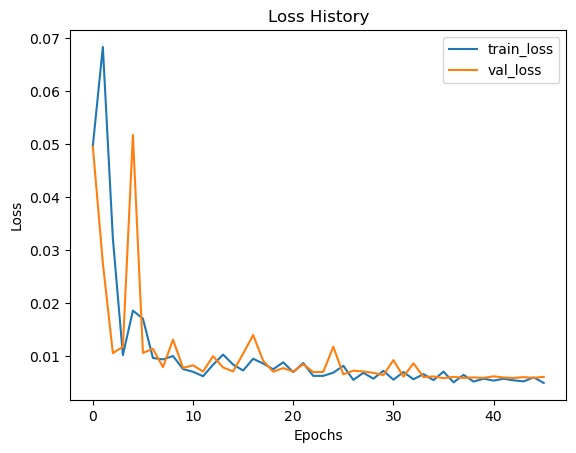

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

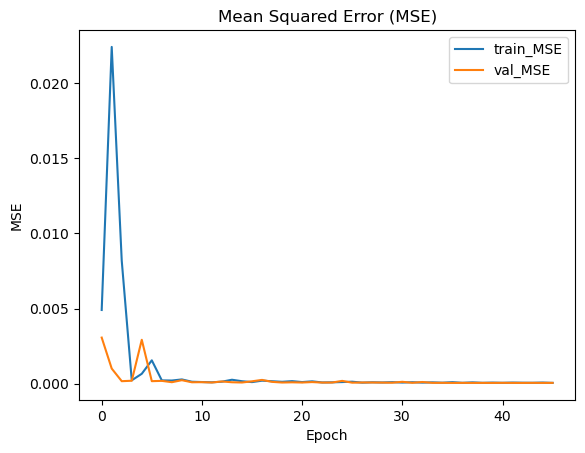

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

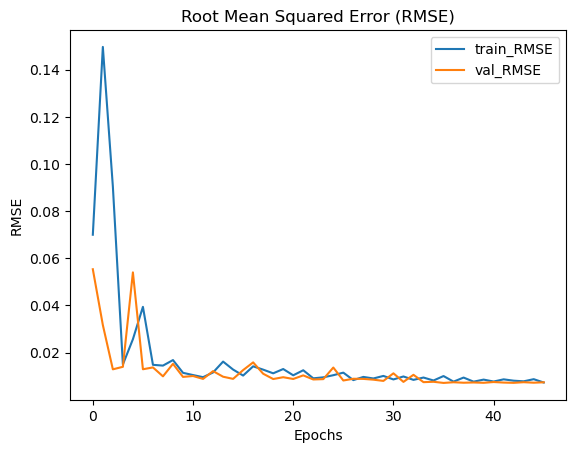

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

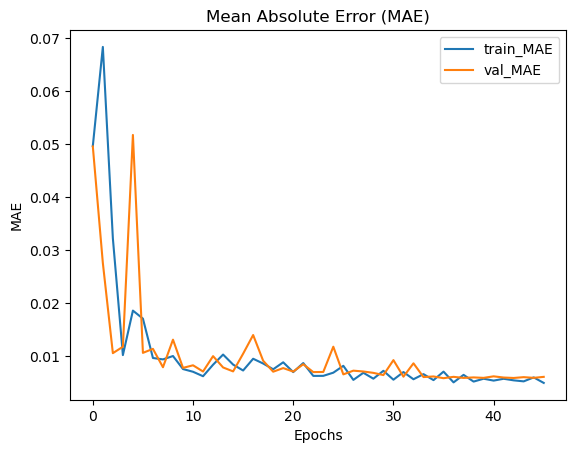

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

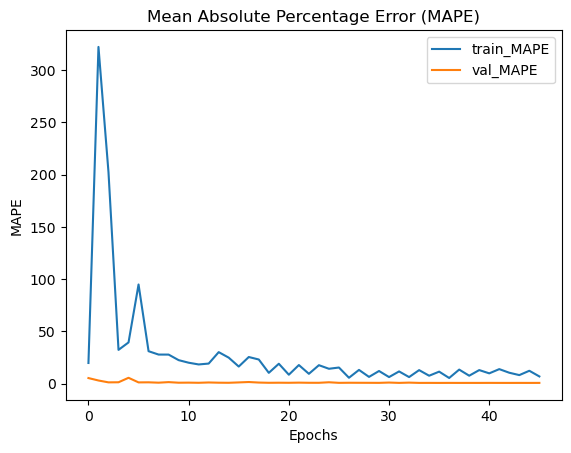

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:20:51.024901: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


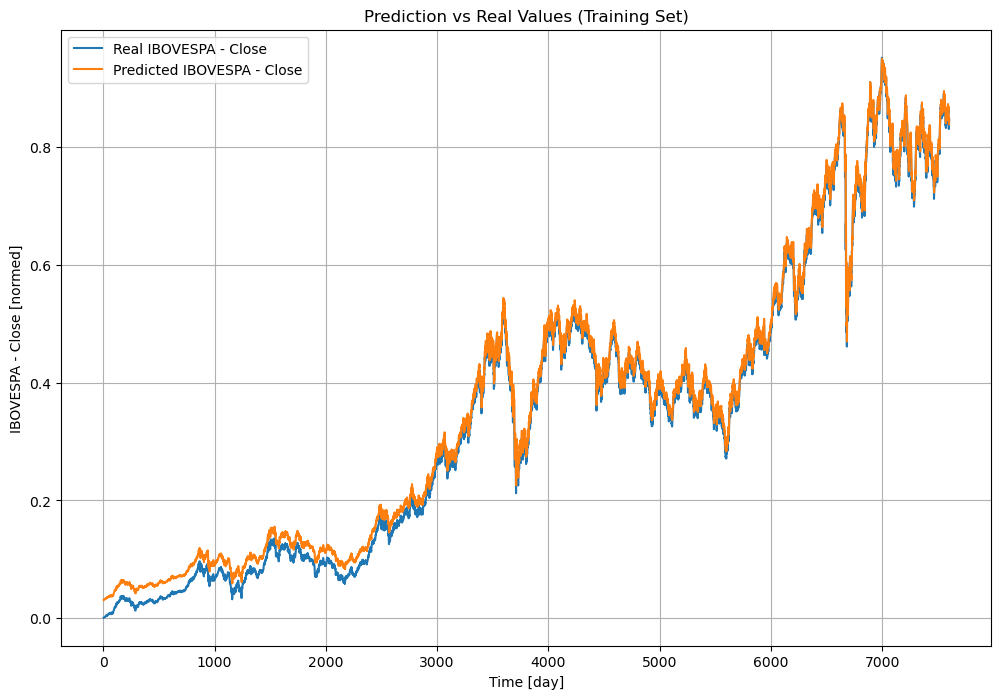

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


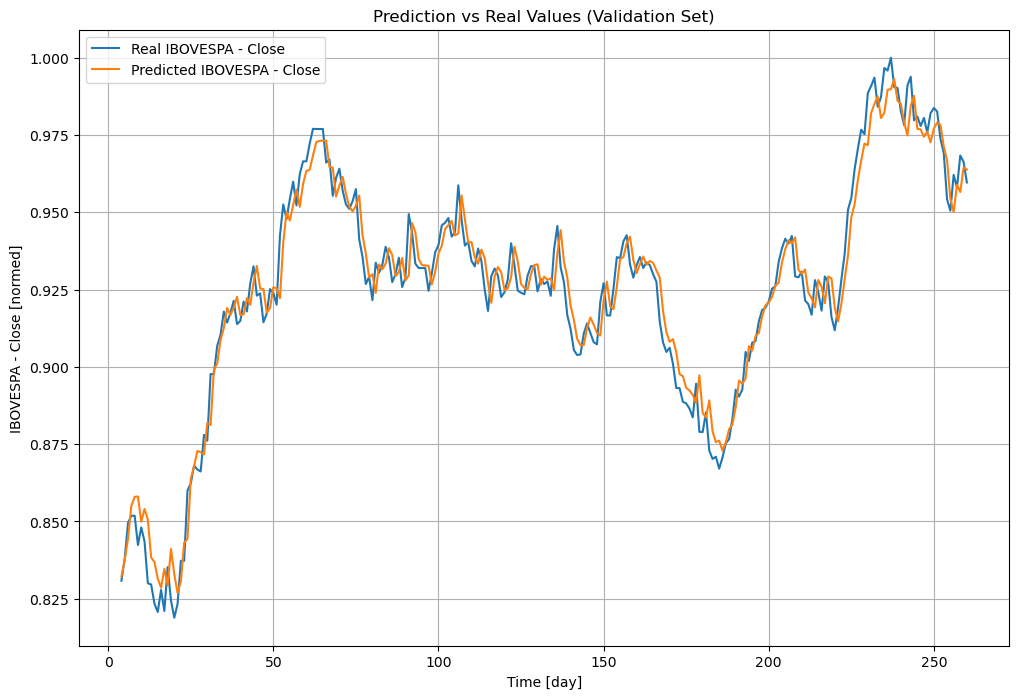

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


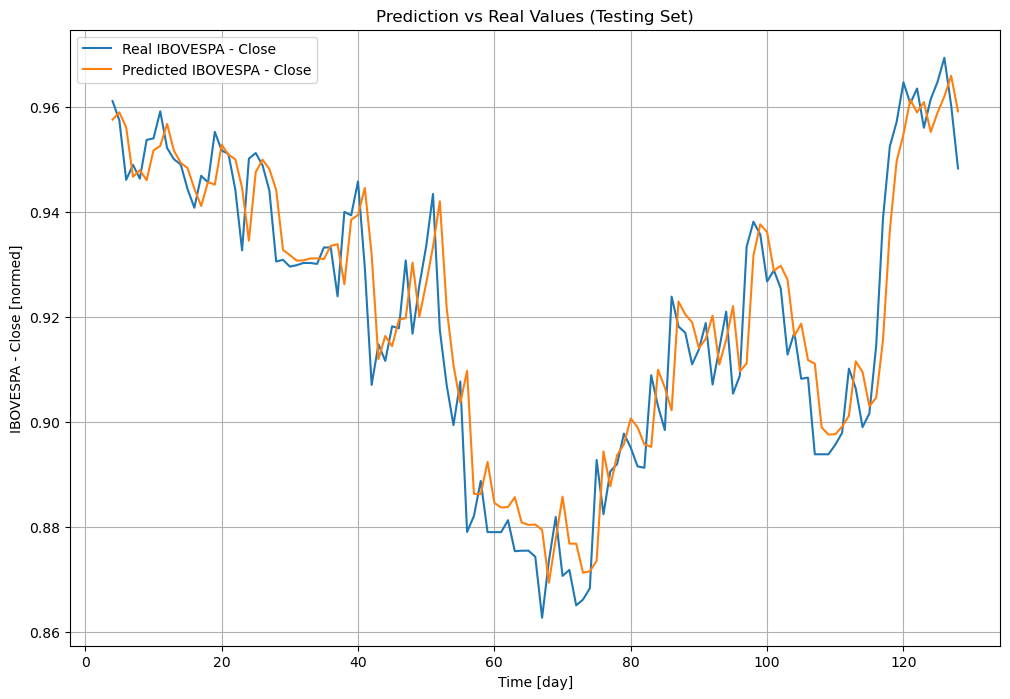

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

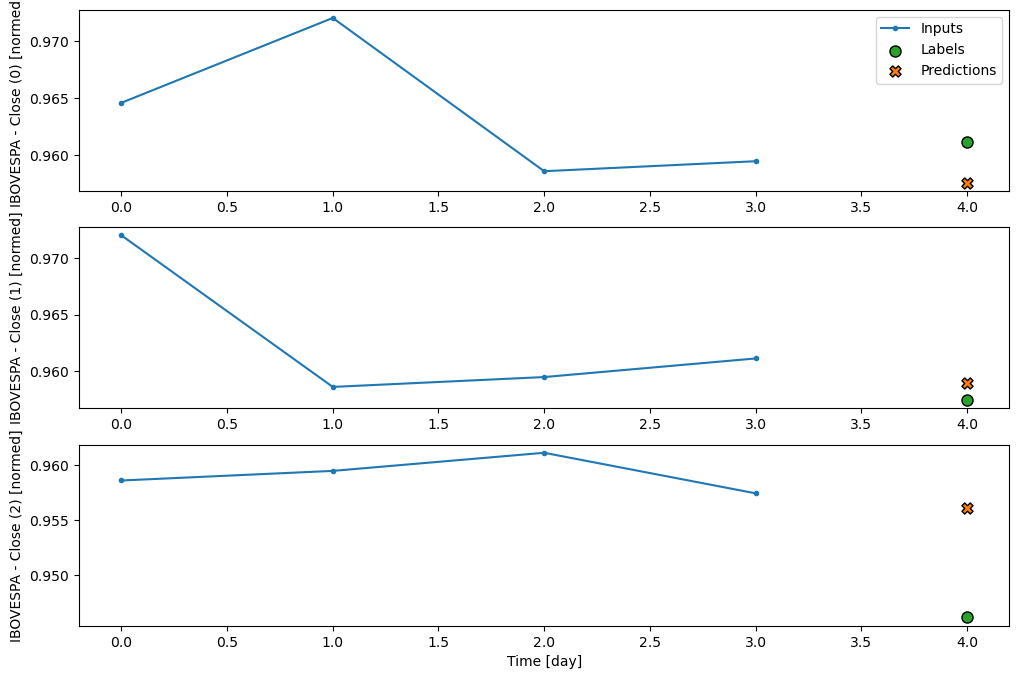

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:27s:579ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[[0.9575815 , 0.9575815 , 0.9575815 , ..., 0.9575815 ,
         0.9575815 , 0.9575815 ]],

       [[0.9589641 , 0.9589641 , 0.9589641 , ..., 0.9589641 ,
         0.9589641 , 0.9589641 ]],

       [[0.9560975 , 0.9560975 , 0.9560975 , ..., 0.9560975 ,
         0.9560975 , 0.9560975 ]],

       ...,

       [[0.9620023 , 0.9620023 , 0.9620023 , ..., 0.9620023 ,
         0.9620023 , 0.9620023 ]],

       [[0.9659271 , 0.9659271 , 0.9659271 , ..., 0.9659271 ,
         0.9659271 , 0.9659271 ]],

       [[0.95914865, 0.95914865, 0.95914865, ..., 0.95914865,
         0.95914865, 0.95914865]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')